In [4]:
from astropy.io import fits
import numpy as np
from matplotlib.pyplot import *
### Import packages ###
import time, sys, os
import h5py
import math
import numpy as np
import astropy as ap
from scipy import stats
import pandas as pd
from matplotlib.pyplot import *

# Import packages to display SDSS optical image
from PIL import Image
import requests

# Import packages to open fits and calculate cosmology
from astropy.io import fits
from astropy.cosmology import WMAP9
import astropy.coordinates as coord
from astroquery.sdss import SDSS
from scipy.io import readsav
from astropy.coordinates import SkyCoord
import astropy.units as u


# Import prospector 
sys.path.insert(0, '/mnt/c/Users/emma_d/ASTR_Research/lib/python3.8/site-packages/repo/prospector/')
# import prospect     #likelihood evaluations, parameter priors, and posterior sampling
# from prospect.models.templates import TemplateLibrary
# from prospect.likelihood import lnlike_spec, lnlike_phot, write_log
# from prospect.likelihood import chi_spec, chi_phot
# from prospect.fitting import fit_model
# from prospect.io import write_results as writer
# import prospect.io.read_results as reader
# import fsps

# import corner

# Import MCMC package
import emcee

# Import my build functions
# from build_model_funct import build_model
# from build_obs_funct_Win import build_obs
# from FracSFH_ import FracSFH

import seaborn as sns
my_cmap = sns.color_palette("tab10")
import os
import tables

### re-defining plotting defaults for matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib import colors
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})
rcParams.update({'axes.facecolor':'w'})
rcParams.update({'savefig.facecolor':'w'})
rcParams.update({'lines.linewidth':'0.7'})
rcParams.update({'font.size':'16'})

rcParams.update({'axes.prop_cycle': cycler(color = sns.color_palette("tab10"))})
%matplotlib inline

rcParams['figure.dpi'] = 300


In [5]:
DSVP = pd.read_csv('Data/DSV_AGN_Vizer.csv', sep=',', header=0)
DSVP.loc[DSVP['Gal_desig'] == 'A10']['fagn']

53    0.04894
Name: fagn, dtype: float64

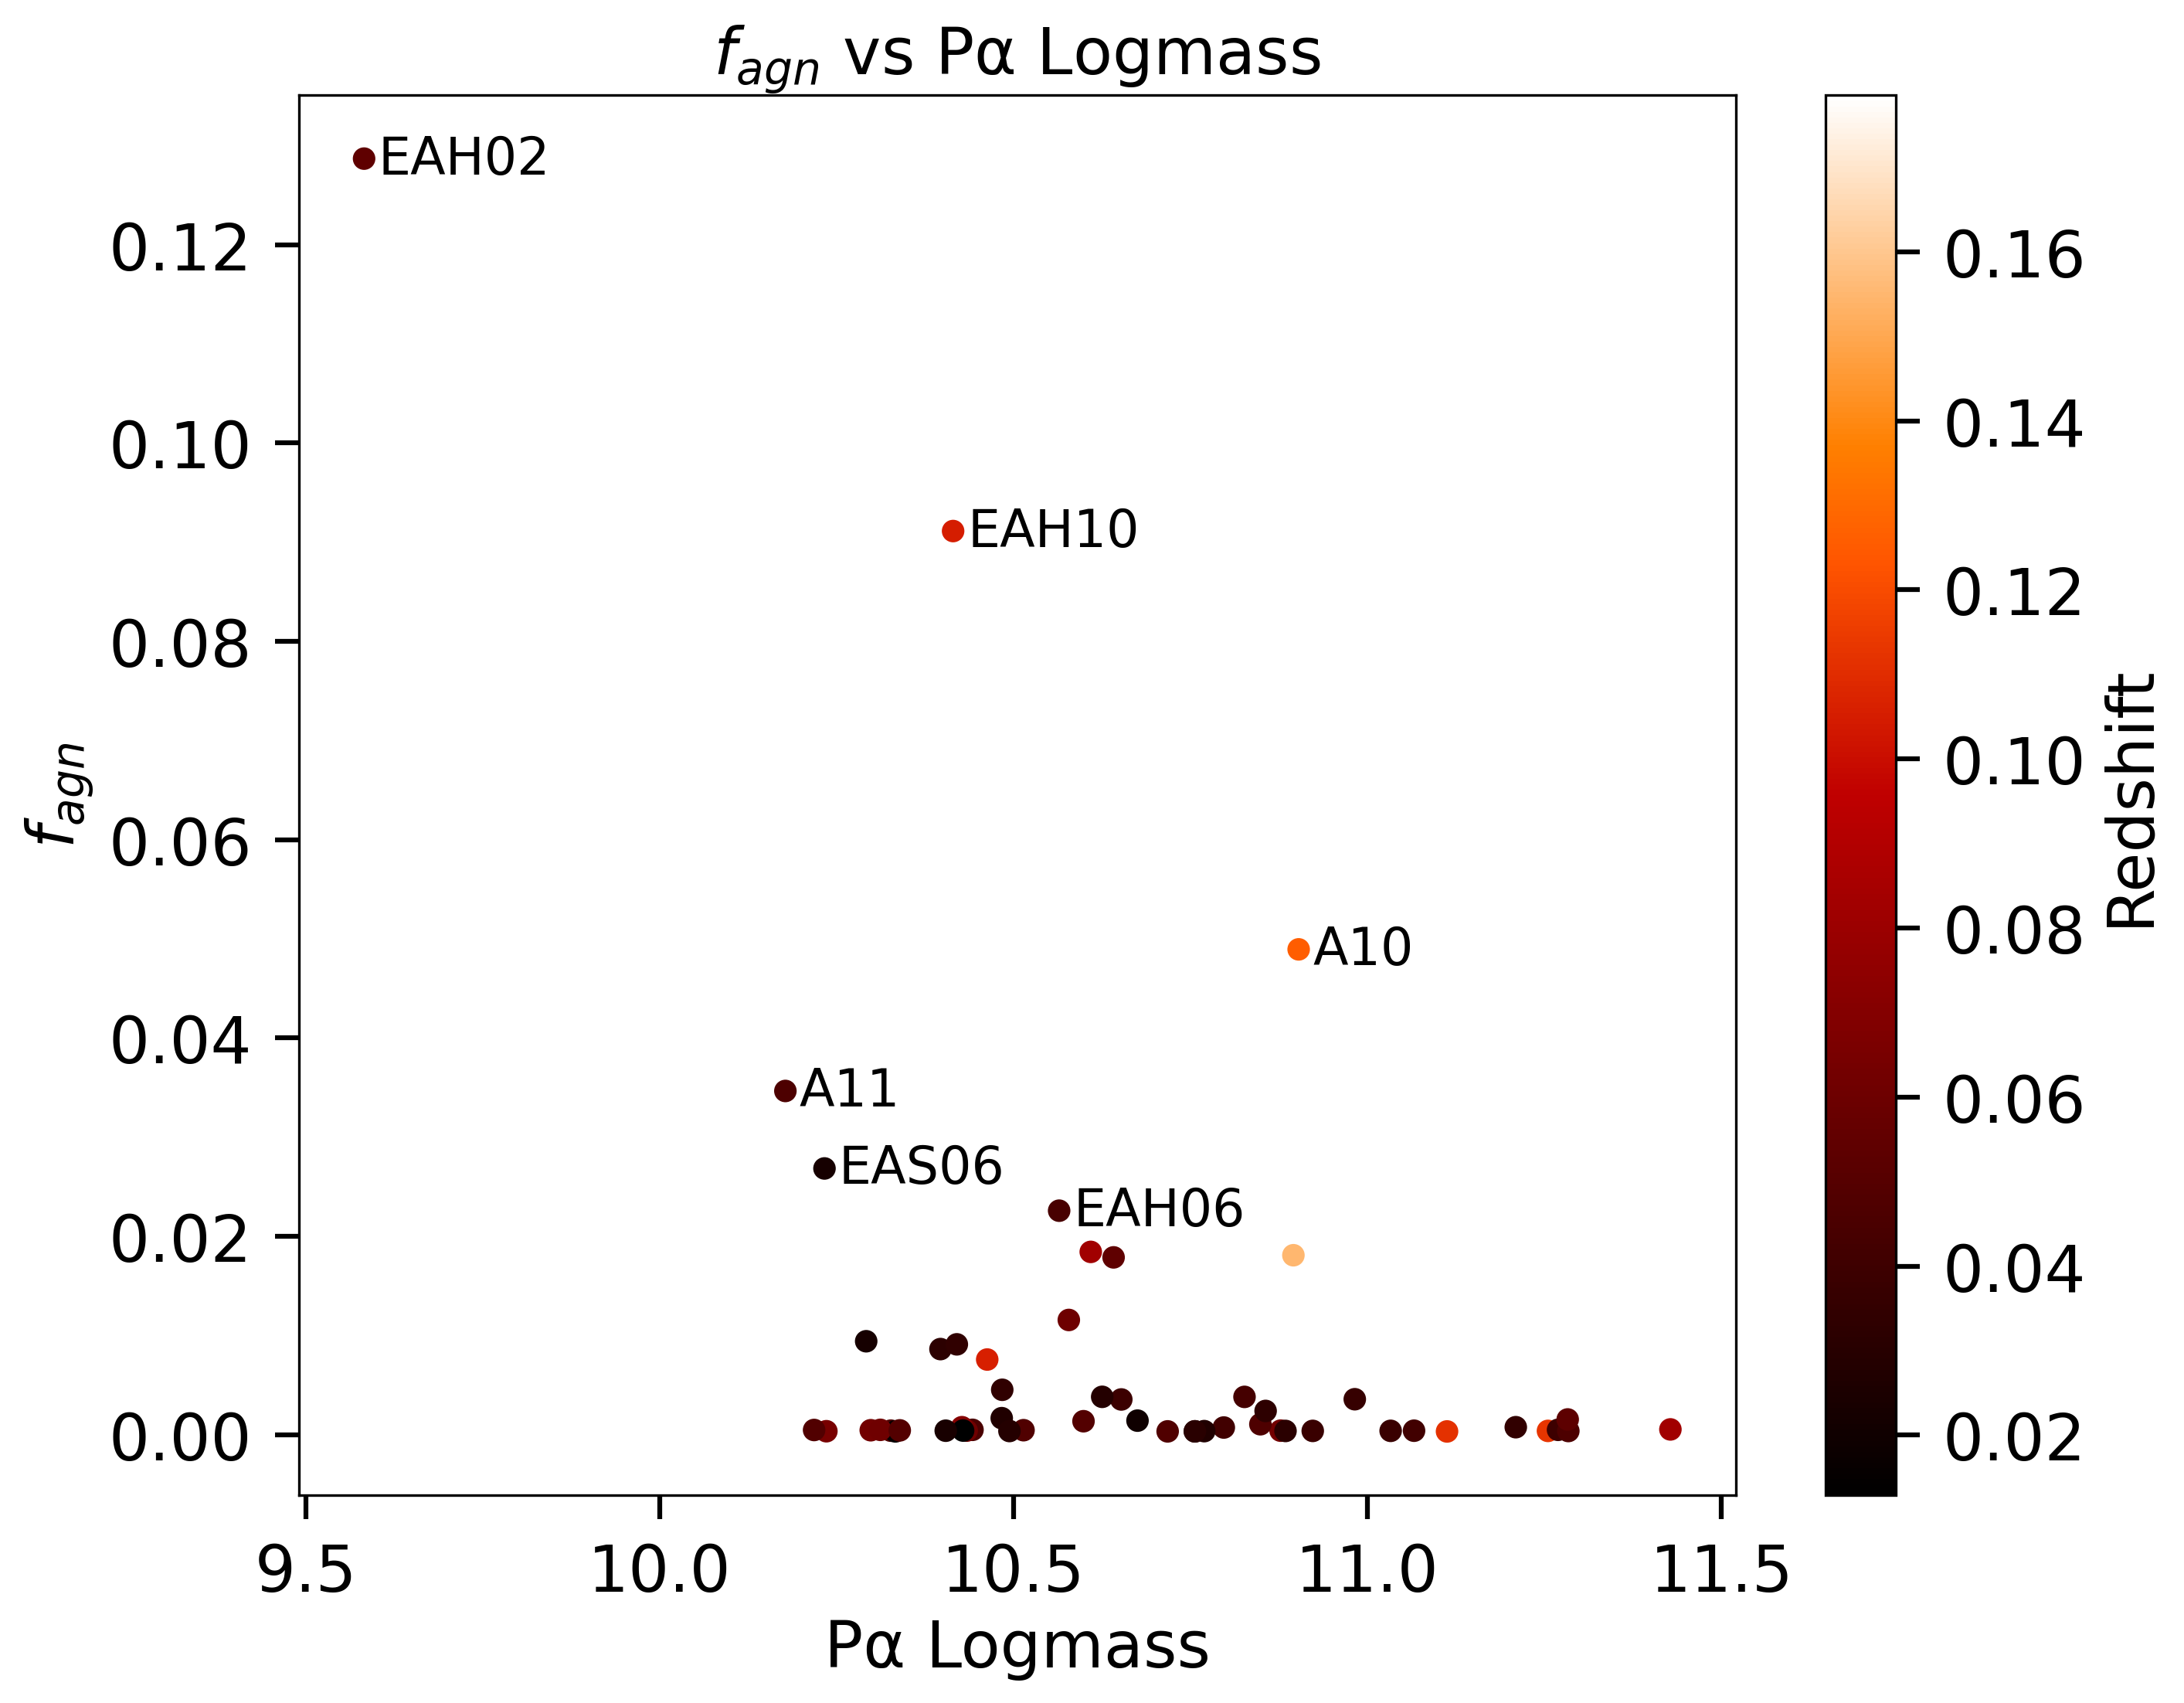

In [6]:
rcParams['font.size'] = 20
font_size = 20

redshift = DSVP['z'] #DSVP['zred_a'] - 1       #[item -1 for item in DSVP['zred_a']]
# redshift_size = [item*1000 for item in redshift]

fig = figure(figsize=(10,8))
logmass = DSVP['logmass']       #[lmass[0] for lmass in theta_bestfit]
fagn = DSVP['fagn']             #[f_agn[14] for f_agn in theta_bestfit]

scatter(logmass, fagn, c=redshift, cmap='gist_heat') #s=

cbar = colorbar() #ticks = redshift
# cbar.set_ticklabels(['{0}, {1}'.format(G_numbers[i], Gal_desig[i]) for i in range(0, len(G_numbers))])
cbar.set_label(label='Redshift', size=font_size)

xlabel('Pα Logmass', size=font_size)
ylabel('$f_{agn}$', size= font_size)
title('$f_{agn}$ vs Pα Logmass', size=font_size)


offset = .000001

for i, txt in enumerate(DSVP['Gal_desig']): #G_numbers
    if fagn[i] >= .02:
        annotate(txt, (logmass[i] + 20000*offset, fagn[i] - 1500*offset), fontsize = 16)


savefig('Comparison/fagn_logmass_z.png')

(-0.8, 1.8)

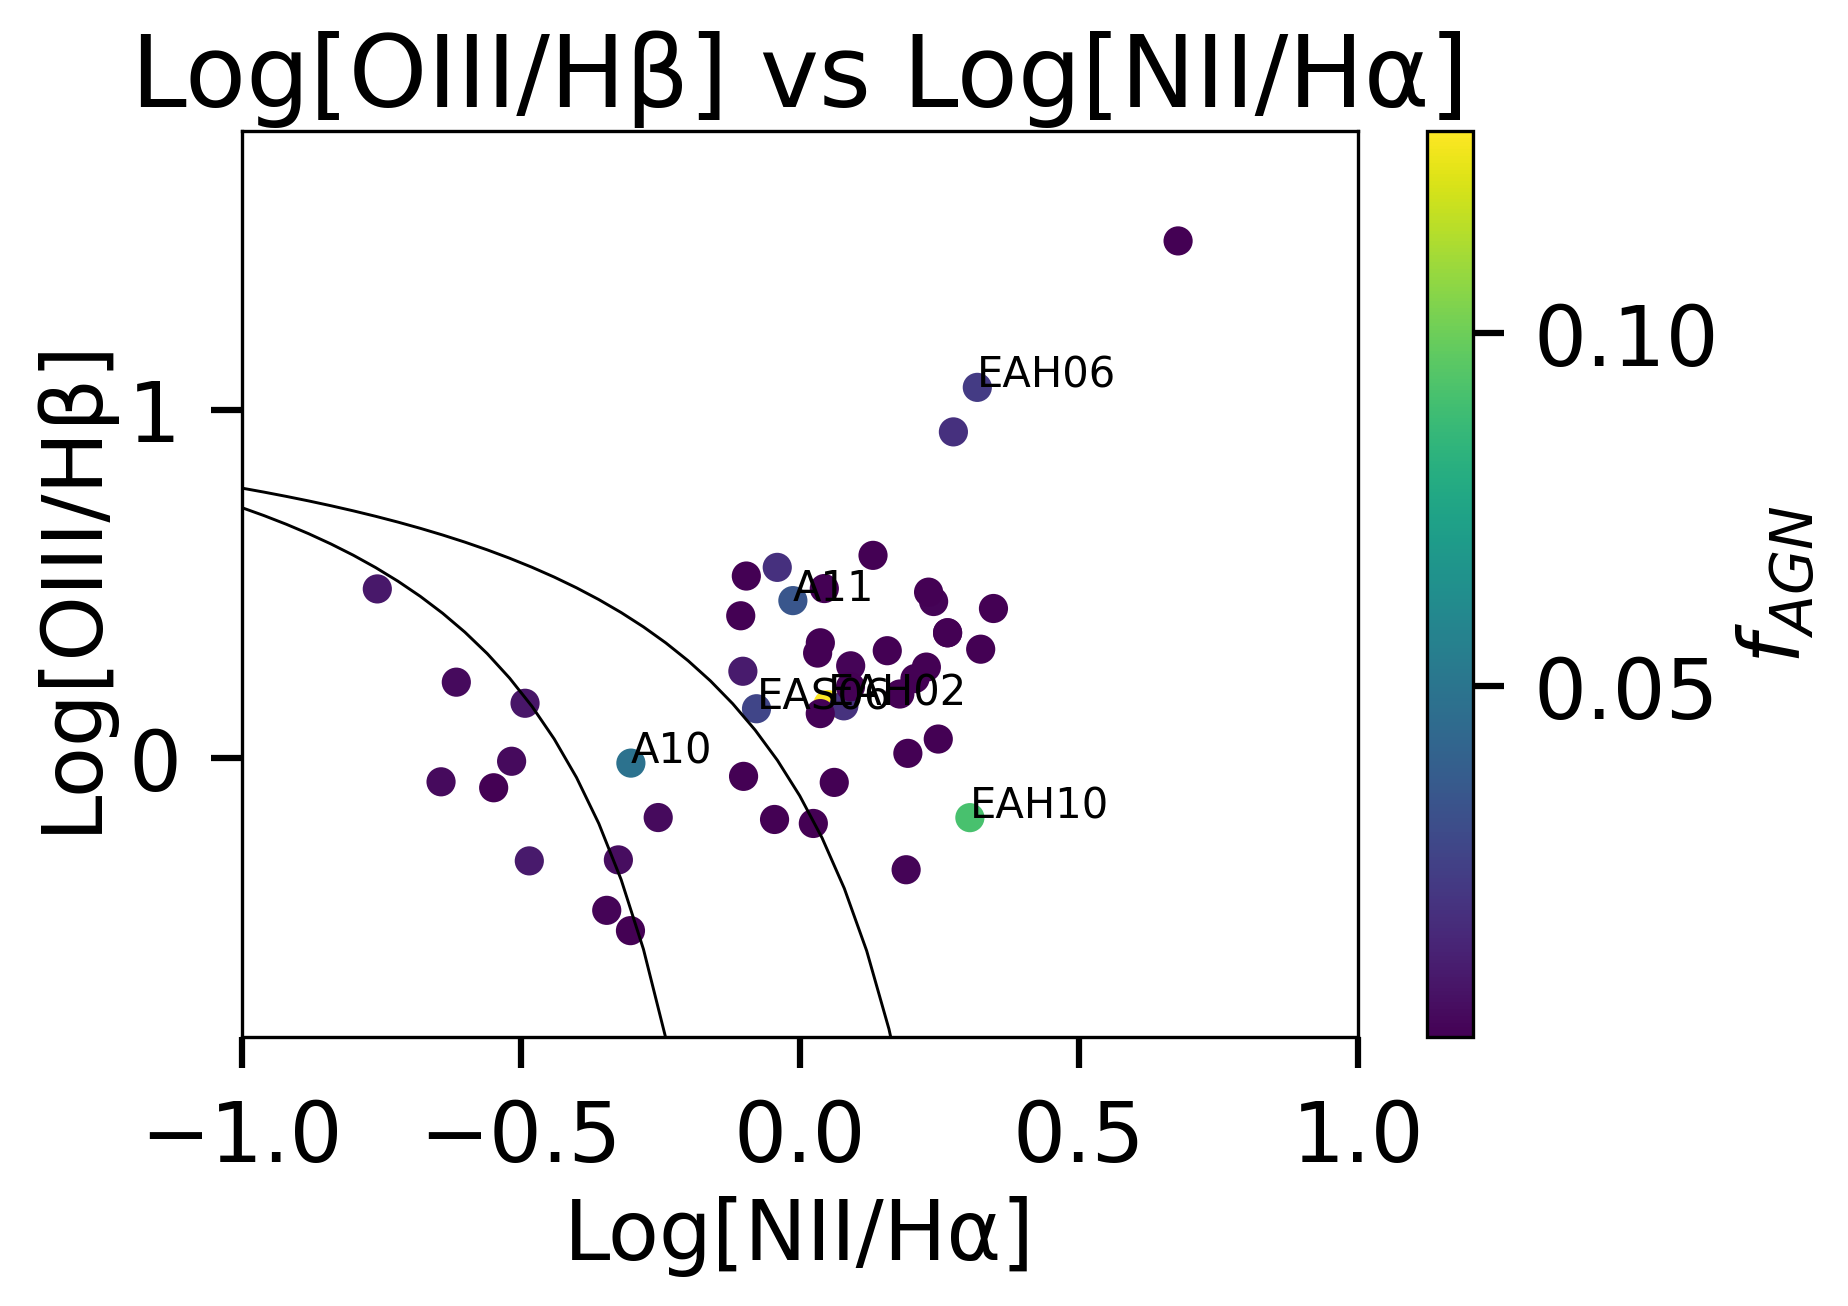

In [7]:
xalli_um = np.divide(DSVP['nii_6584_flux'], DSVP['h_alpha_flux'], 
    out = np.zeros_like(DSVP['nii_6584_flux']), where=(DSVP['h_alpha_flux'] != 0))

yalli_um = np.divide(DSVP['oiii_5007_flux'], DSVP['h_beta_flux'], 
    out = np.zeros_like(DSVP['oiii_5007_flux']), where=(DSVP['h_beta_flux'] != 0))
usefulness2 = np.where((xalli_um > 0) & (yalli_um > 0) )
# print(usefulness2[0])
# print(len(xall_um), len(yall_um))

xall_um = xalli_um[usefulness2[0]]
yall_um = yalli_um[usefulness2[0]]


# cbar = colorbar(ticks = sdss_fagn)    
normalize = colors.Normalize(vmin=0, vmax=0.13)

# for i, value in enumerate(usefulness2[0]):  
scatter(np.log10(xall_um), np.log10(yall_um), c=DSVP['fagn'][usefulness2[0]]) #, marker = galaxy_marker_type[i])
cbar = colorbar()
cbar.set_label(label='$f_{AGN}$')

title('Log[OIII/Hβ] vs Log[NII/Hα]')
ylabel('Log[OIII/Hβ]')
xlabel('Log[NII/Hα]')

G_desig_Use1 = DSVP['Gal_desig'][usefulness2[0]]
fagn_Use1 = DSVP['fagn'][usefulness2[0]]

for i in usefulness2[0]:
    if DSVP['fagn'][i] >= .02:
        annotate(DSVP['Gal_desig'][i], (np.log10(xall_um[i]), np.log10(yall_um[i])),  fontsize=10)

autoscale(False)

x = np.arange(50)/25 -2
y = 0.61/(x-0.05)+1.3
plot(x,y,color='k') #kauffmann+03 line

x = np.arange(60)/25 -2
y = 0.61/(x-0.47)+1.19
plot(x,y,color='k') #kewley+01 line


xlim(-1,1)
ylim(-.8,1.8)

(-0.75, 1.7)

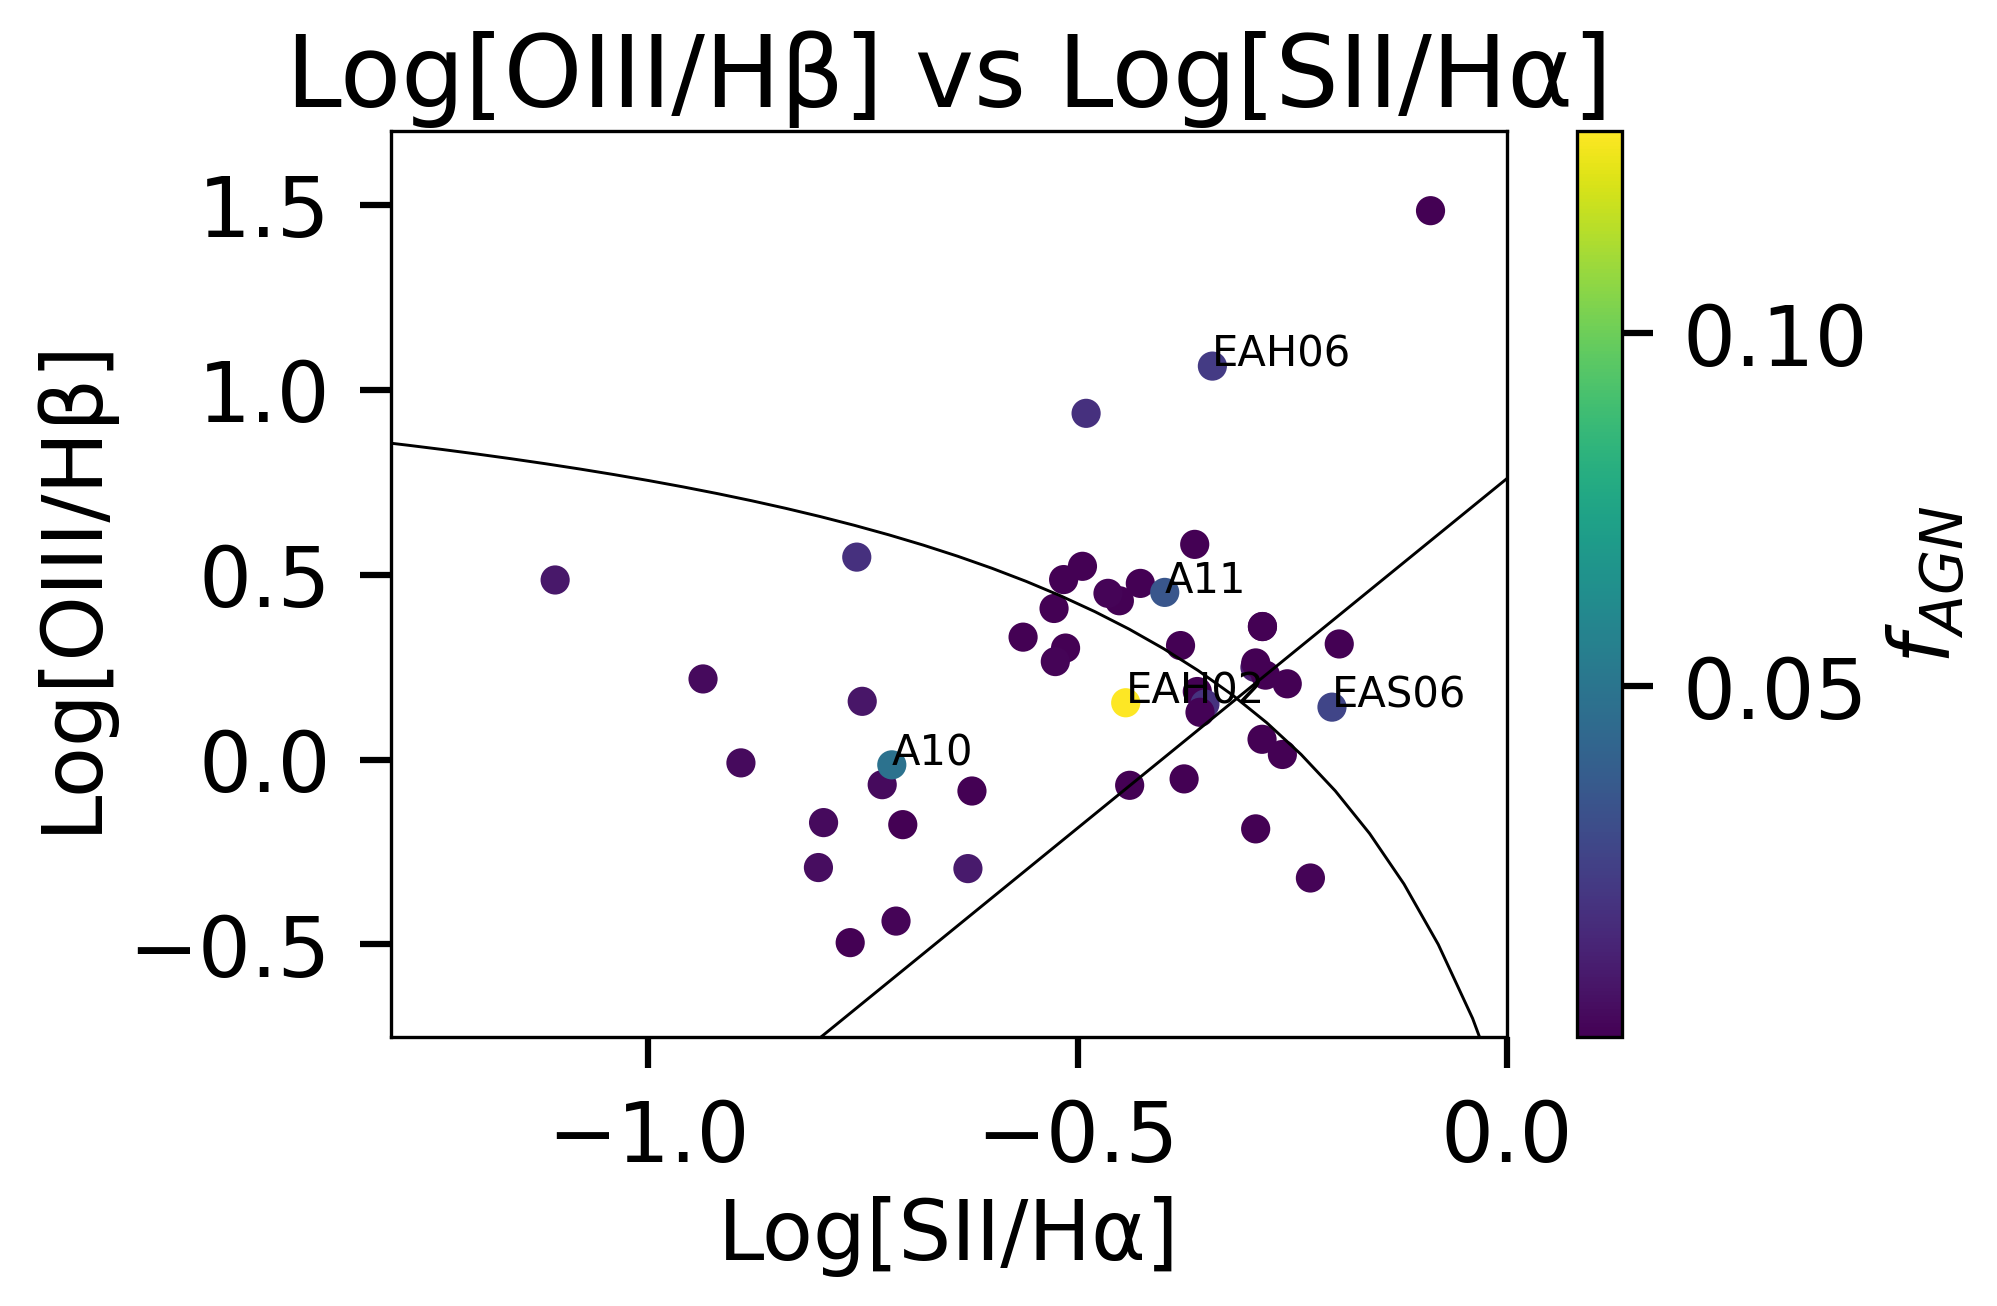

In [8]:
xalli_um = np.divide(DSVP['sii_6717_flux'], DSVP['h_alpha_flux'], 
    out = np.zeros_like(DSVP['sii_6717_flux']), where=(DSVP['h_alpha_flux'] != 0))

yalli_um = np.divide(DSVP['oiii_5007_flux'], DSVP['h_beta_flux'], 
    out = np.zeros_like(DSVP['oiii_5007_flux']), where=(DSVP['h_beta_flux'] != 0))
usefulness2 = np.where((xalli_um > 0) & (yalli_um > 0) )
# print(usefulness2[0])
# print(len(xall_um), len(yall_um))

xall_um = xalli_um[usefulness2[0]]
yall_um = yalli_um[usefulness2[0]]
   
normalize = colors.Normalize(vmin=0, vmax=0.13)

scatter(np.log10(xall_um[usefulness2[0]]), np.log10(yall_um[usefulness2[0]]), c=DSVP['fagn'][usefulness2[0]]) #, marker = galaxy_marker_type[i])
cbar = colorbar()
cbar.set_label(label='$f_{AGN}$')

title('Log[OIII/Hβ] vs Log[SII/Hα]')
ylabel('Log[OIII/Hβ]')
xlabel('Log[SII/Hα]')

for i in usefulness2[0]:
    if DSVP['fagn'][i] >= .02:
        annotate(DSVP['Gal_desig'][i], (np.log10(xall_um[i]), np.log10(yall_um[i])),  fontsize=10)

# autoscale(False)

x = np.arange(75)/25 -2
y = 0.72/(x-0.32)+1.3
plot(x,y,color='k') #Main AGN line

x = np.arange(75)/25 -2
y = 1.89*(x)+0.76
plot(x,y,color='k') #LINER/Sy2 line

xlim(-1.3,0)
ylim(-.75,1.7)

(-0.75, 1.75)

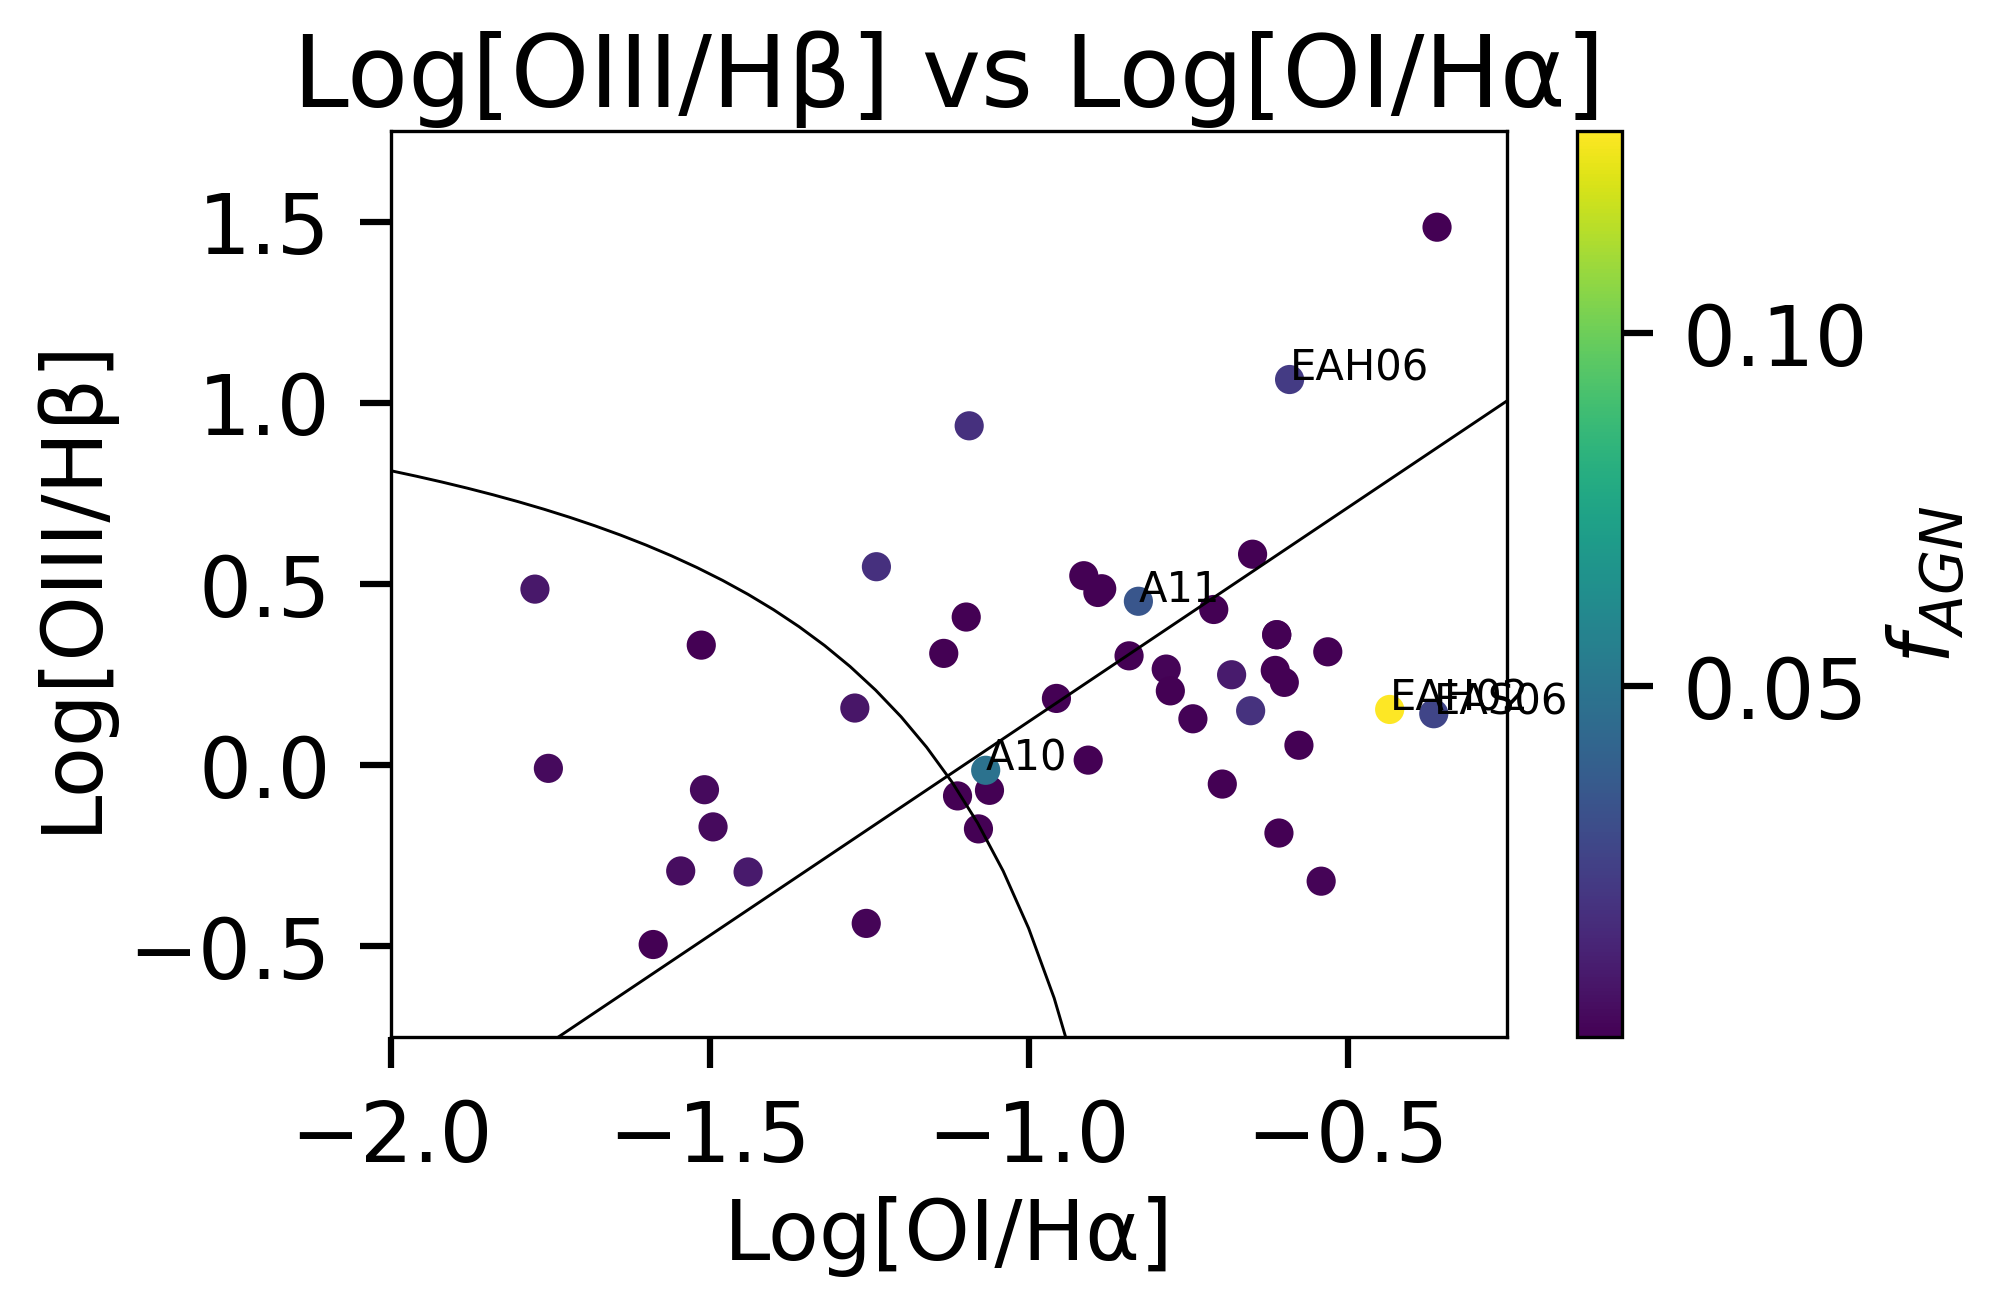

In [9]:
xalli_um = np.divide(DSVP['oi_6300_flux'], DSVP['h_alpha_flux'], 
    out = np.zeros_like(DSVP['oi_6300_flux']), where=(DSVP['h_alpha_flux'] != 0))

yalli_um = np.divide(DSVP['oiii_5007_flux'], DSVP['h_beta_flux'], 
    out = np.zeros_like(DSVP['oiii_5007_flux']), where=(DSVP['h_beta_flux'] != 0))
usefulness2 = np.where((xalli_um > 0) & (yalli_um > 0) )
# print(usefulness2[0])
# print(len(xall_um), len(yall_um))

xall_um = xalli_um[usefulness2[0]]
yall_um = yalli_um[usefulness2[0]]

# crit1 = np.log10(yall_um) - np.log10(xall_um) * np.tan((90 - 25) * np.pi/180)
# crit2 = (np.log10(yall_um) - 1.19) * (np.log10(xall_um)-0.47)
# n_seyferts = np.where((crit1 > .45) & (crit2 < 0.79))
# n_sf = np.where(crit2 > 0.61)
# n_liner = np.where((crit1 < 0.45) & (crit2 < 0.61))

# galaxy_marker_type = np.empty(len(xall_um), dtype=str)
# for i in range(0, len(DSVP['G_numbers'][usefulness2[0]])):
#     if i in n_liner[0]:
#         galaxy_marker_type[i] = "o"
#     elif i in n_sf[0]:
#         galaxy_marker_type[i] = '*'
#     elif i in n_seyferts[0]:
#         galaxy_marker_type[i] = 'd'

# cbar = colorbar(ticks = sdss_fagn)    
normalize = colors.Normalize(vmin=0, vmax=0.13)

scatter(np.log10(xall_um[usefulness2[0]]), np.log10(yall_um[usefulness2[0]]), c=DSVP['fagn'][usefulness2[0]]) #, marker = galaxy_marker_type[i])
cbar = colorbar()
cbar.set_label(label='$f_{AGN}$')

title('Log[OIII/Hβ] vs Log[OI/Hα]')
ylabel('Log[OIII/Hβ]')
xlabel('Log[OI/Hα]')

for i in usefulness2[0]:
    if DSVP['fagn'][i] >= .02:
        annotate(DSVP['Gal_desig'][i], (np.log10(xall_um[i]), np.log10(yall_um[i])),  fontsize=10)

# autoscale(False)

x = np.arange(32)/25 -2
y = 0.73/(x+0.59)+1.33
plot(x,y,color='k') #mainAGN line

x = np.arange(75)/25 -2
y = 1.18*(x)+1.30
plot(x,y,color='k') #LINER/Sy2 line

xlim(-2,-.25)
ylim(-.75,1.75)

Text(0.5, 0, 'Age Since Burst Start')

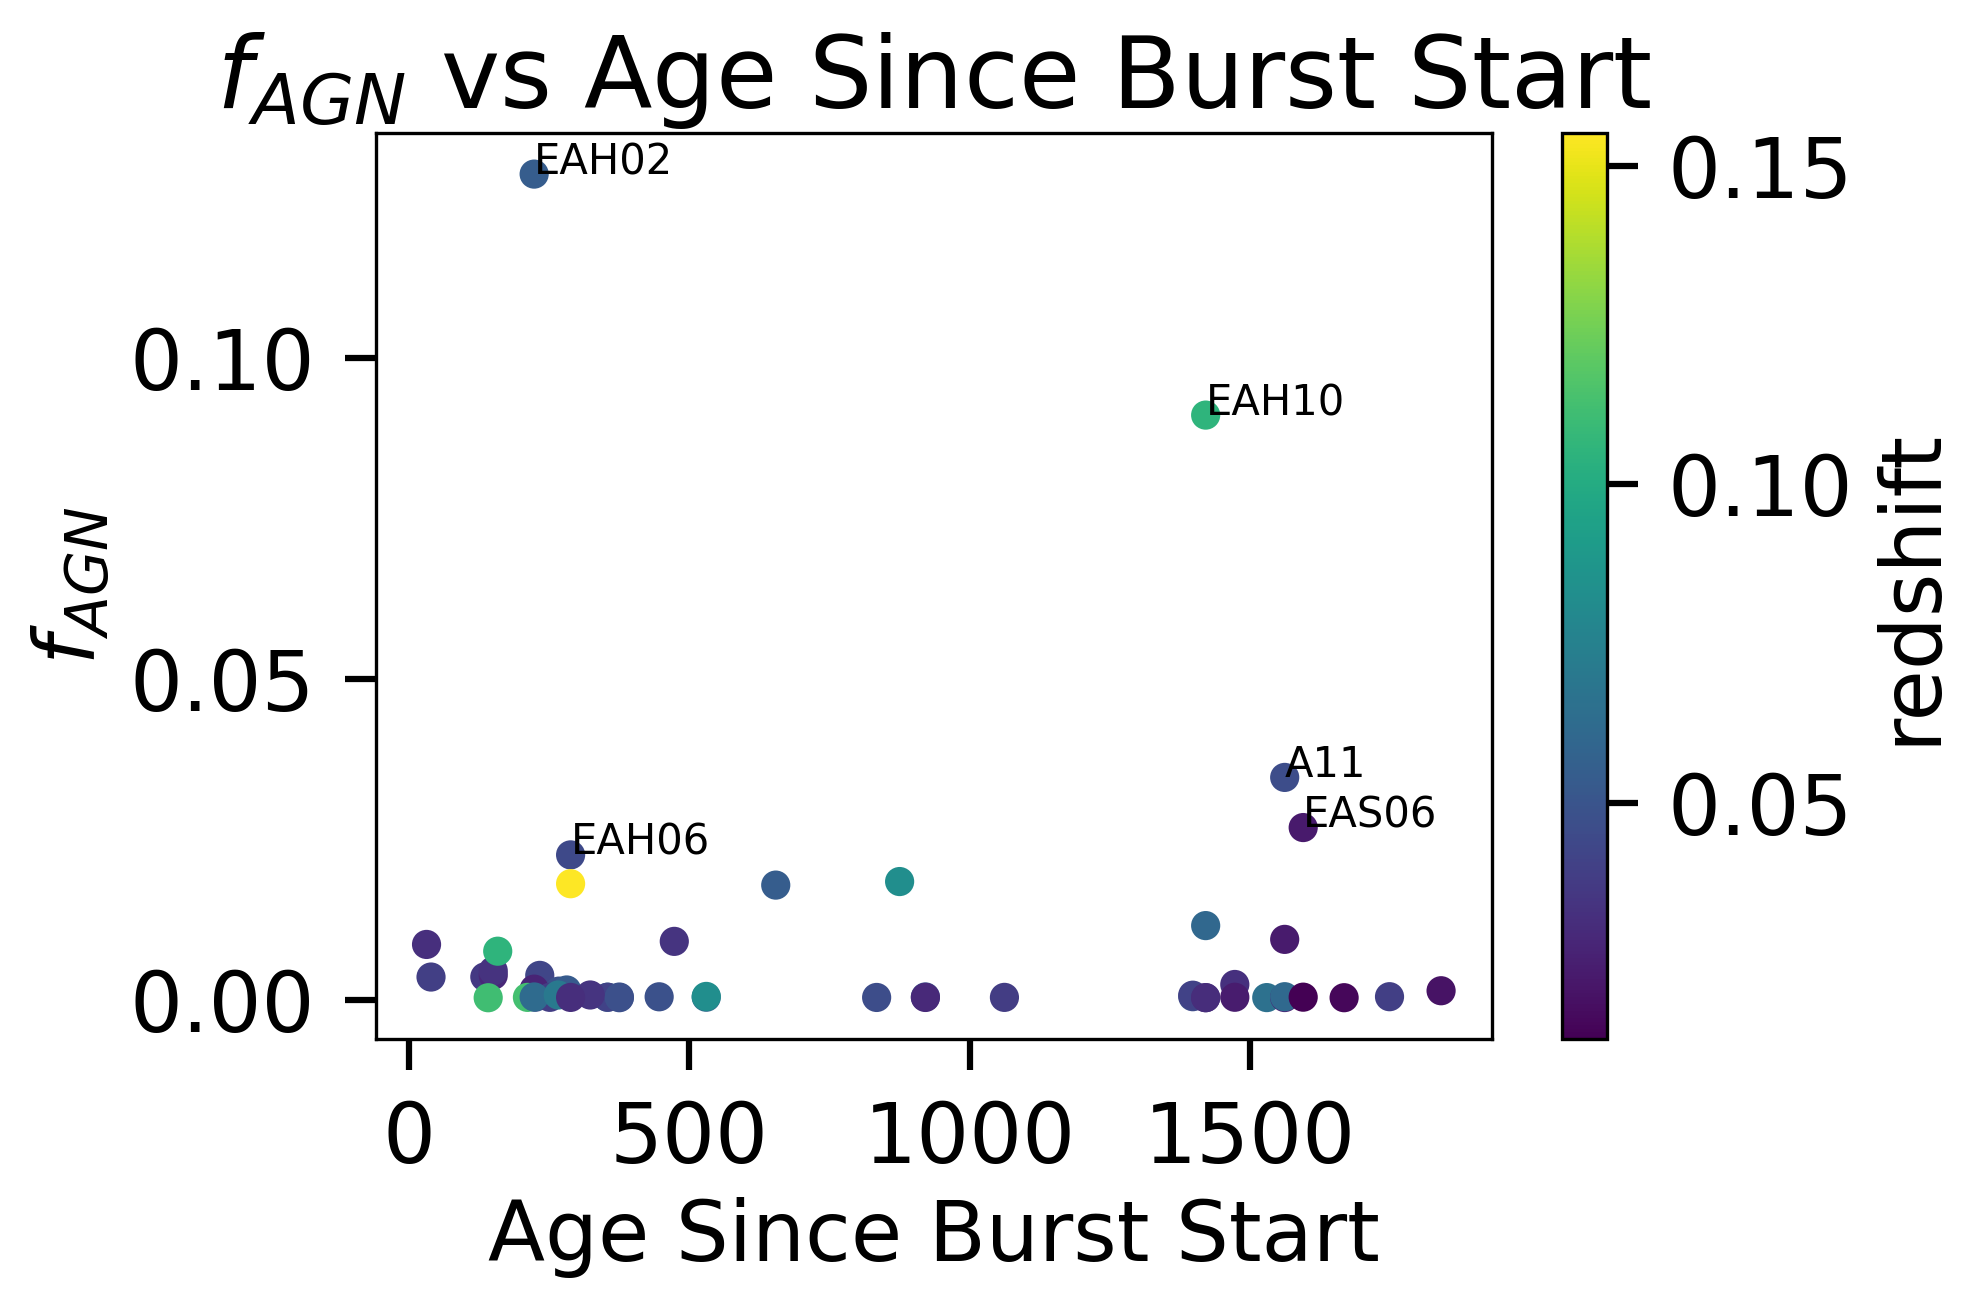

In [10]:
scatter(DSVP['T_0_med'], DSVP['fagn'], c=DSVP['redshift'])

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (DSVP['T_0_med'][i], DSVP['fagn'][i]),  fontsize=10)

cbar = colorbar()
cbar.set_label(label='redshift')

title('$f_{AGN}$ vs Age Since Burst Start')
ylabel('$f_{AGN}$')
xlabel('Age Since Burst Start')

(0.8, 2.2)

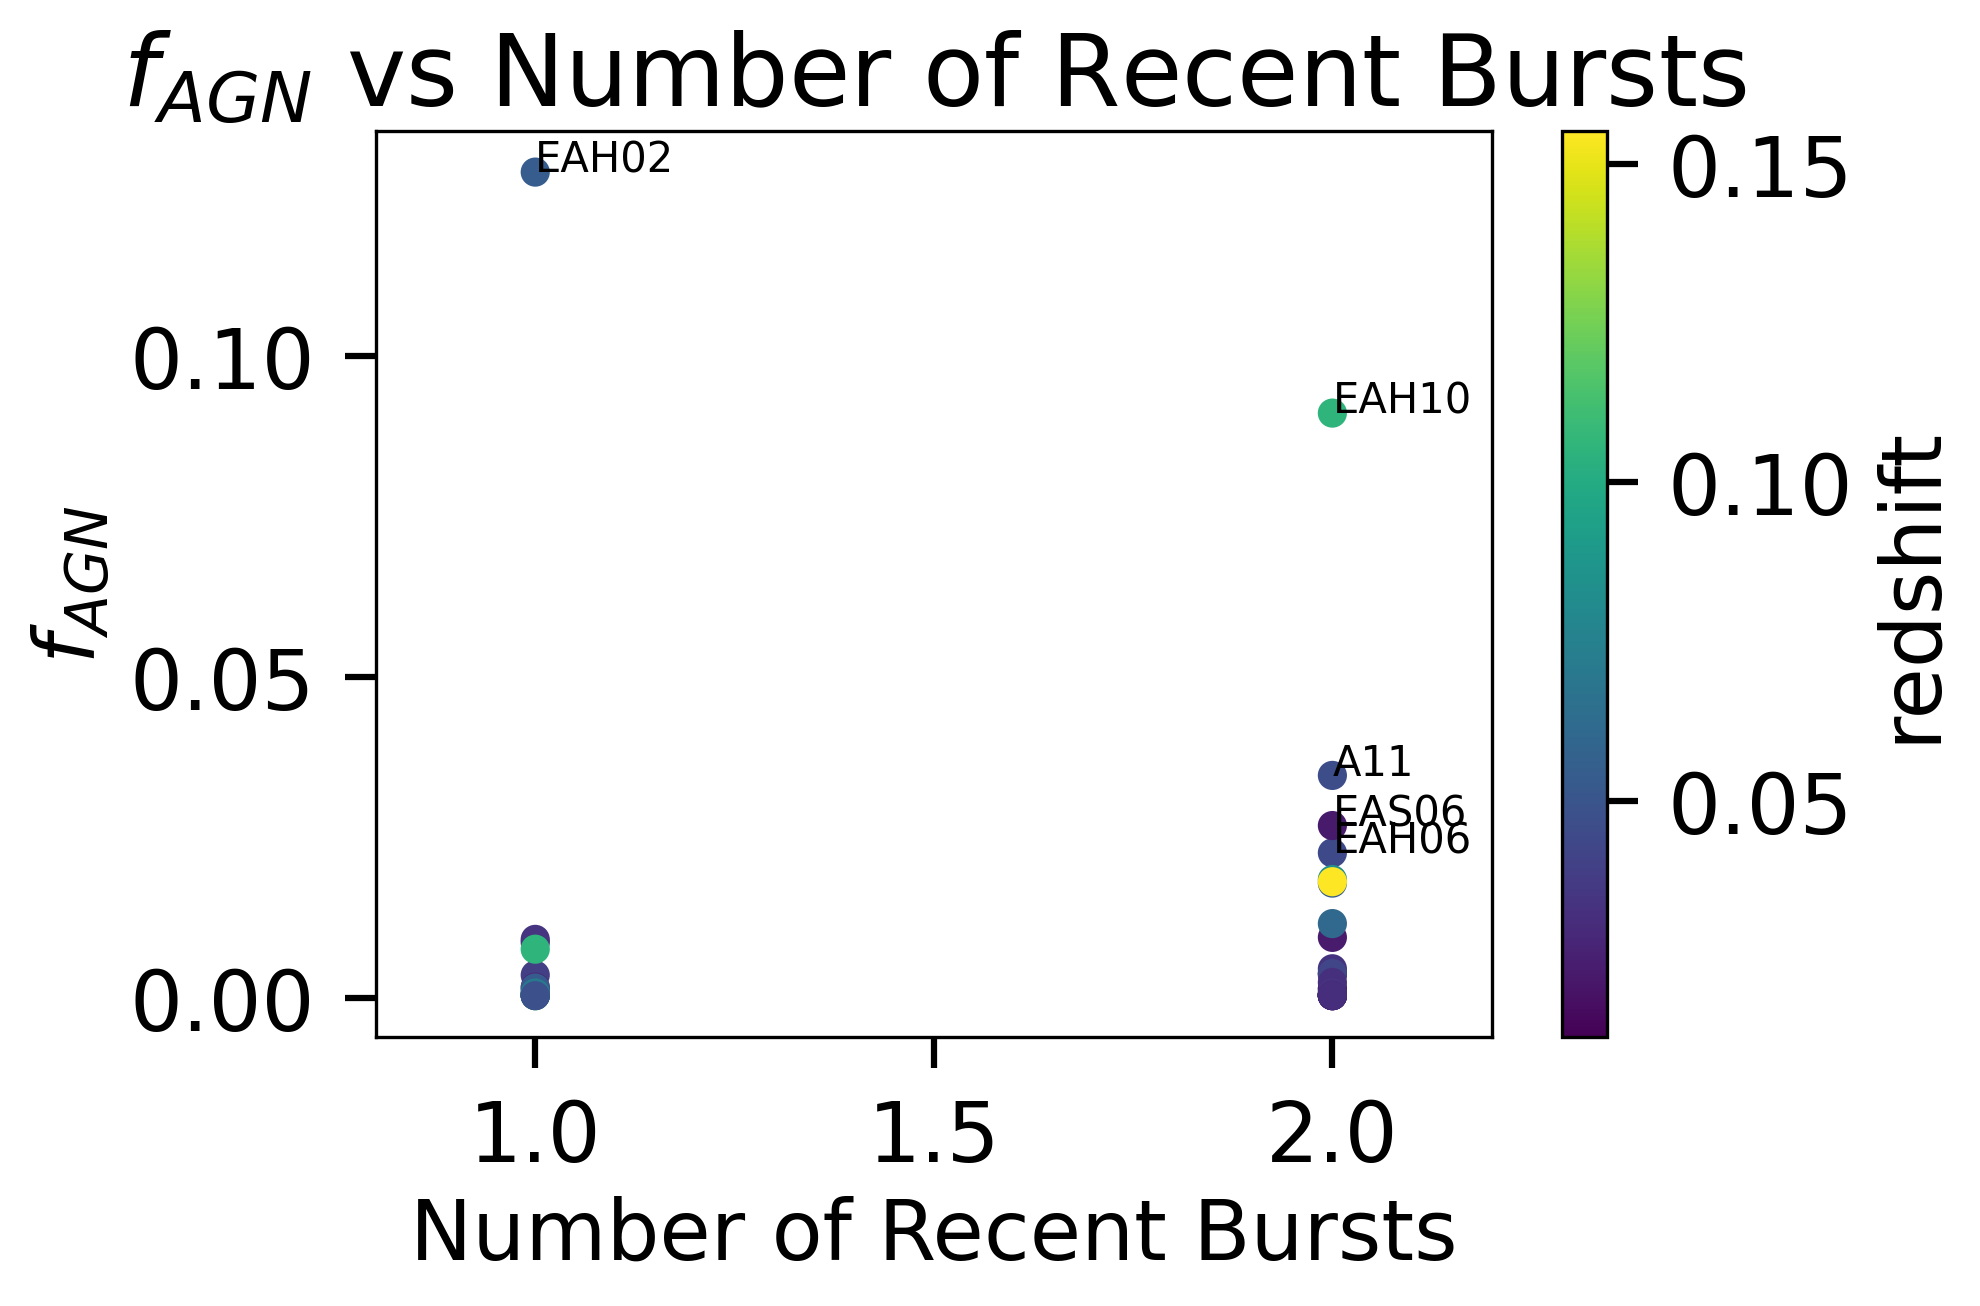

In [11]:
scatter(DSVP['SFH#bursts'], DSVP['fagn'], c=DSVP['z'])
autoscale(True)

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (DSVP['SFH#bursts'][i], DSVP['fagn'][i]),  fontsize=10)



cbar = colorbar()
cbar.set_label(label='redshift')

title('$f_{AGN}$ vs Number of Recent Bursts')
ylabel('$f_{AGN}$')
xlabel('Number of Recent Bursts')

xlim(.8, 2.2)

Text(0.5, 0, 'Burst Mass Fraction')

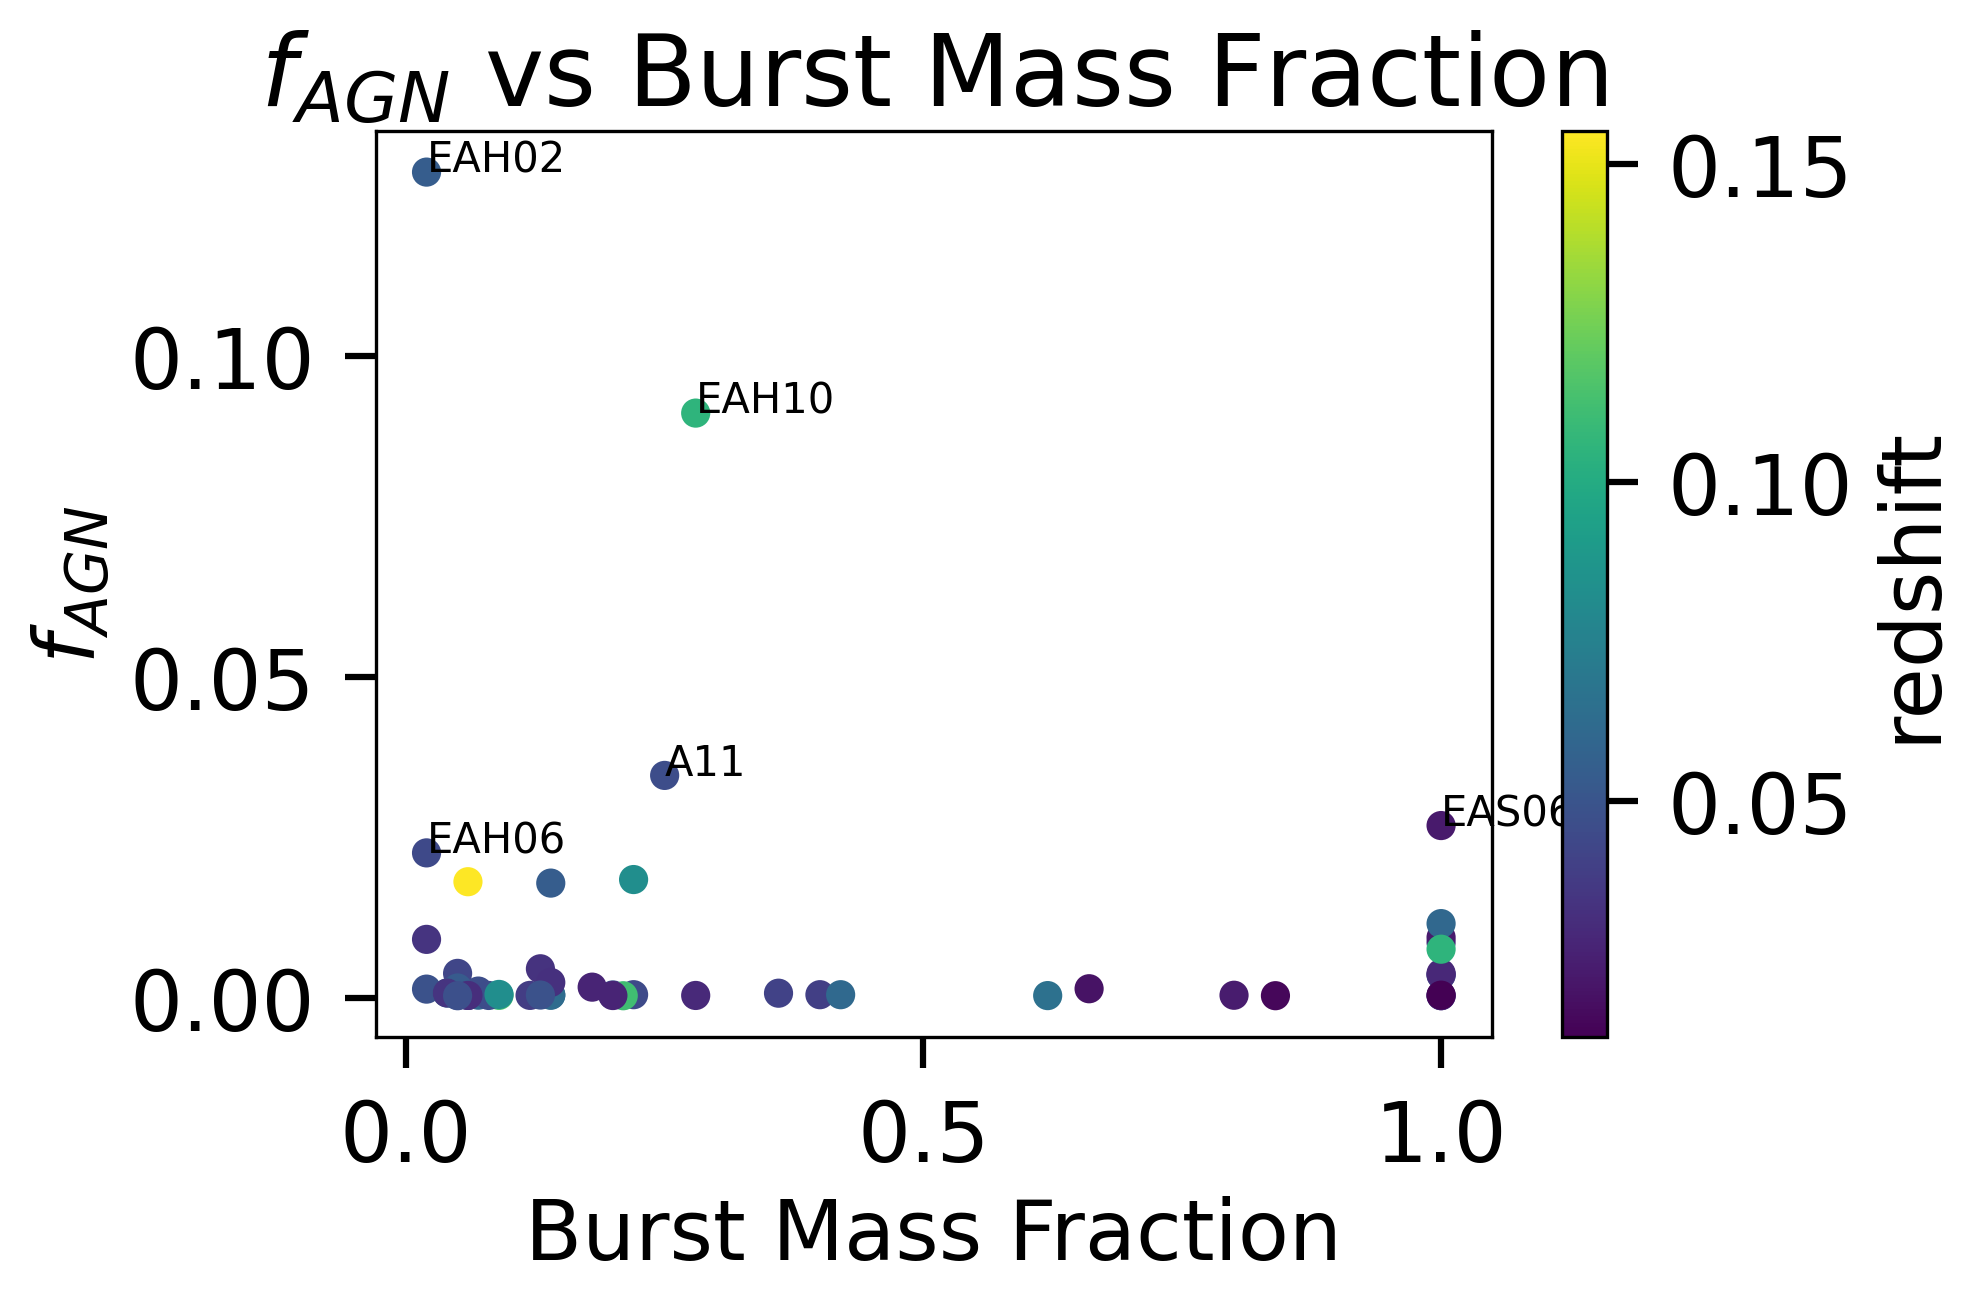

In [12]:
scatter(DSVP['BMF_50'], DSVP['fagn'], c=DSVP['redshift'])
autoscale(True)

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (DSVP['BMF_50'][i], DSVP['fagn'][i]),  fontsize=10)


cbar = colorbar()
cbar.set_label(label='redshift')

title('$f_{AGN}$ vs Burst Mass Fraction')
ylabel('$f_{AGN}$')
xlabel('Burst Mass Fraction')

([<matplotlib.axis.XTick at 0x7f6e2fcf6310>,
 [Text(-1, 0, 'N/A'),
  Text(0, 0, ' '),
  Text(1, 0, 'SF'),
  Text(2, 0, 'Low S/N SF'),
  Text(3, 0, 'Composite'),
  Text(4, 0, 'AGN, NO LINERs'),
  Text(5, 0, 'Low S/N LINER')])

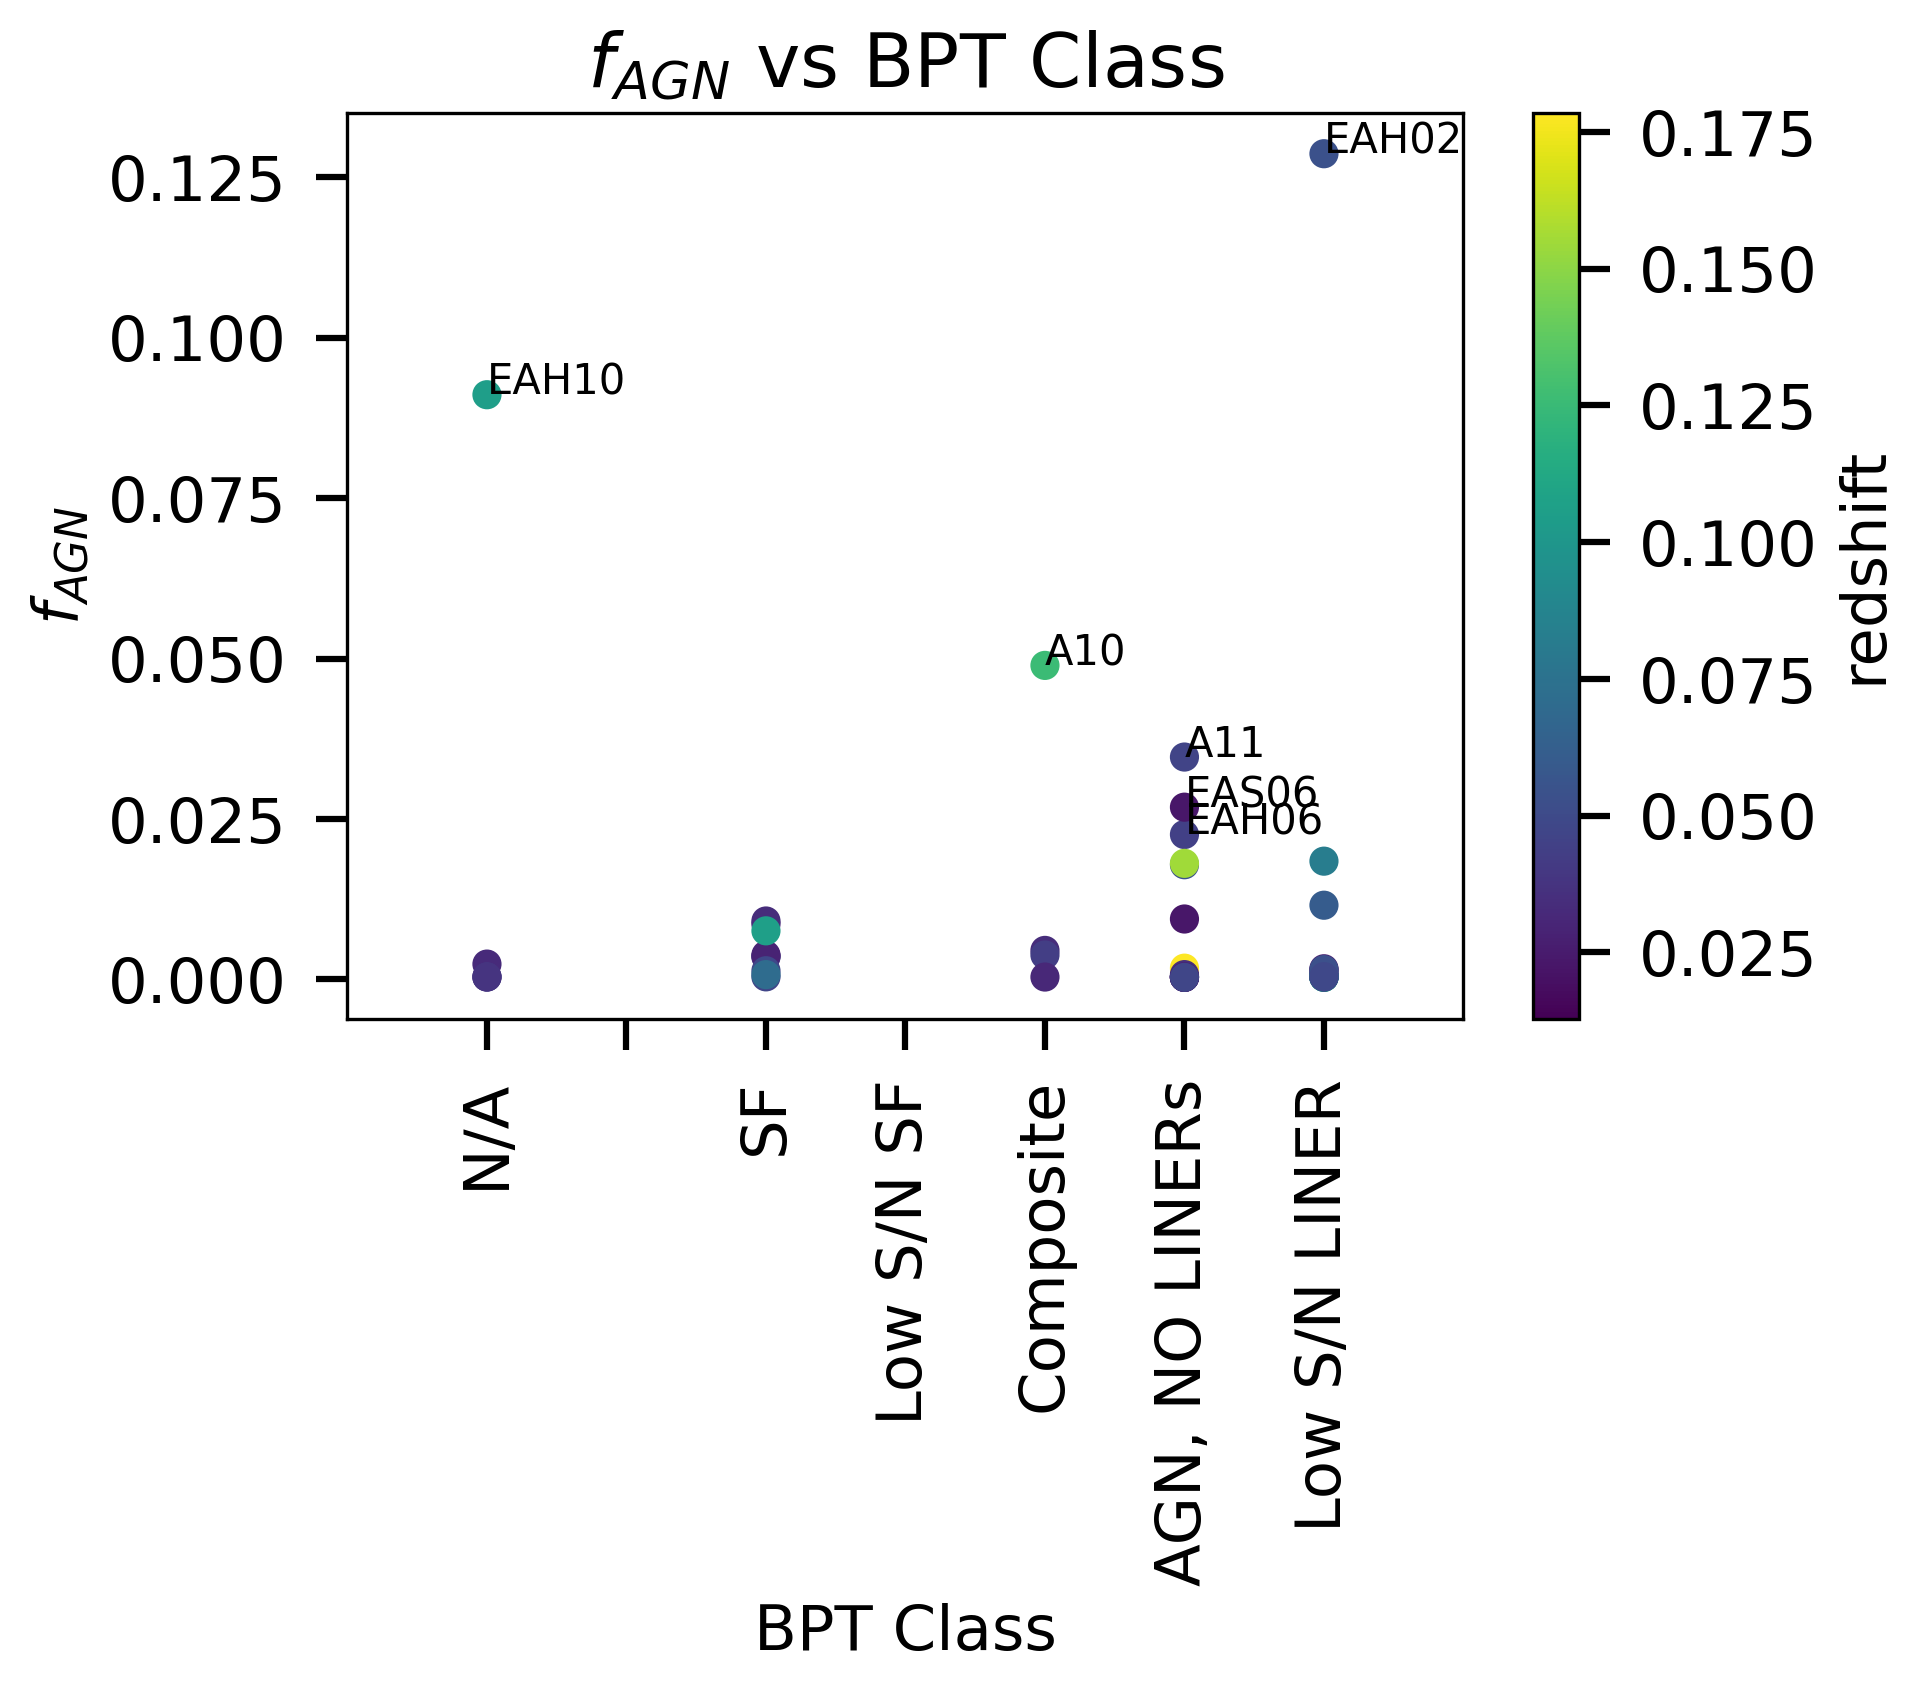

In [13]:
rcParams['font.size'] = 15

scatter(DSVP['bptclass'], DSVP['fagn'], c=DSVP['z'])
autoscale(True)

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (DSVP['bptclass'][i], DSVP['fagn'][i]),  fontsize=10)


cbar = colorbar()
cbar.set_label(label='redshift')

title('$f_{AGN}$ vs BPT Class')
ylabel('$f_{AGN}$')
xlabel('BPT Class')

xlim(-2, 6)
xticks(ticks=[-1,0,1,2,3,4,5], labels=['N/A', ' ', 'SF', 'Low S/N SF', 'Composite', 'AGN, NO LINERs', 'Low S/N LINER'], rotation = 'vertical')

Text(0.5, 0, 'Post Burst Age')

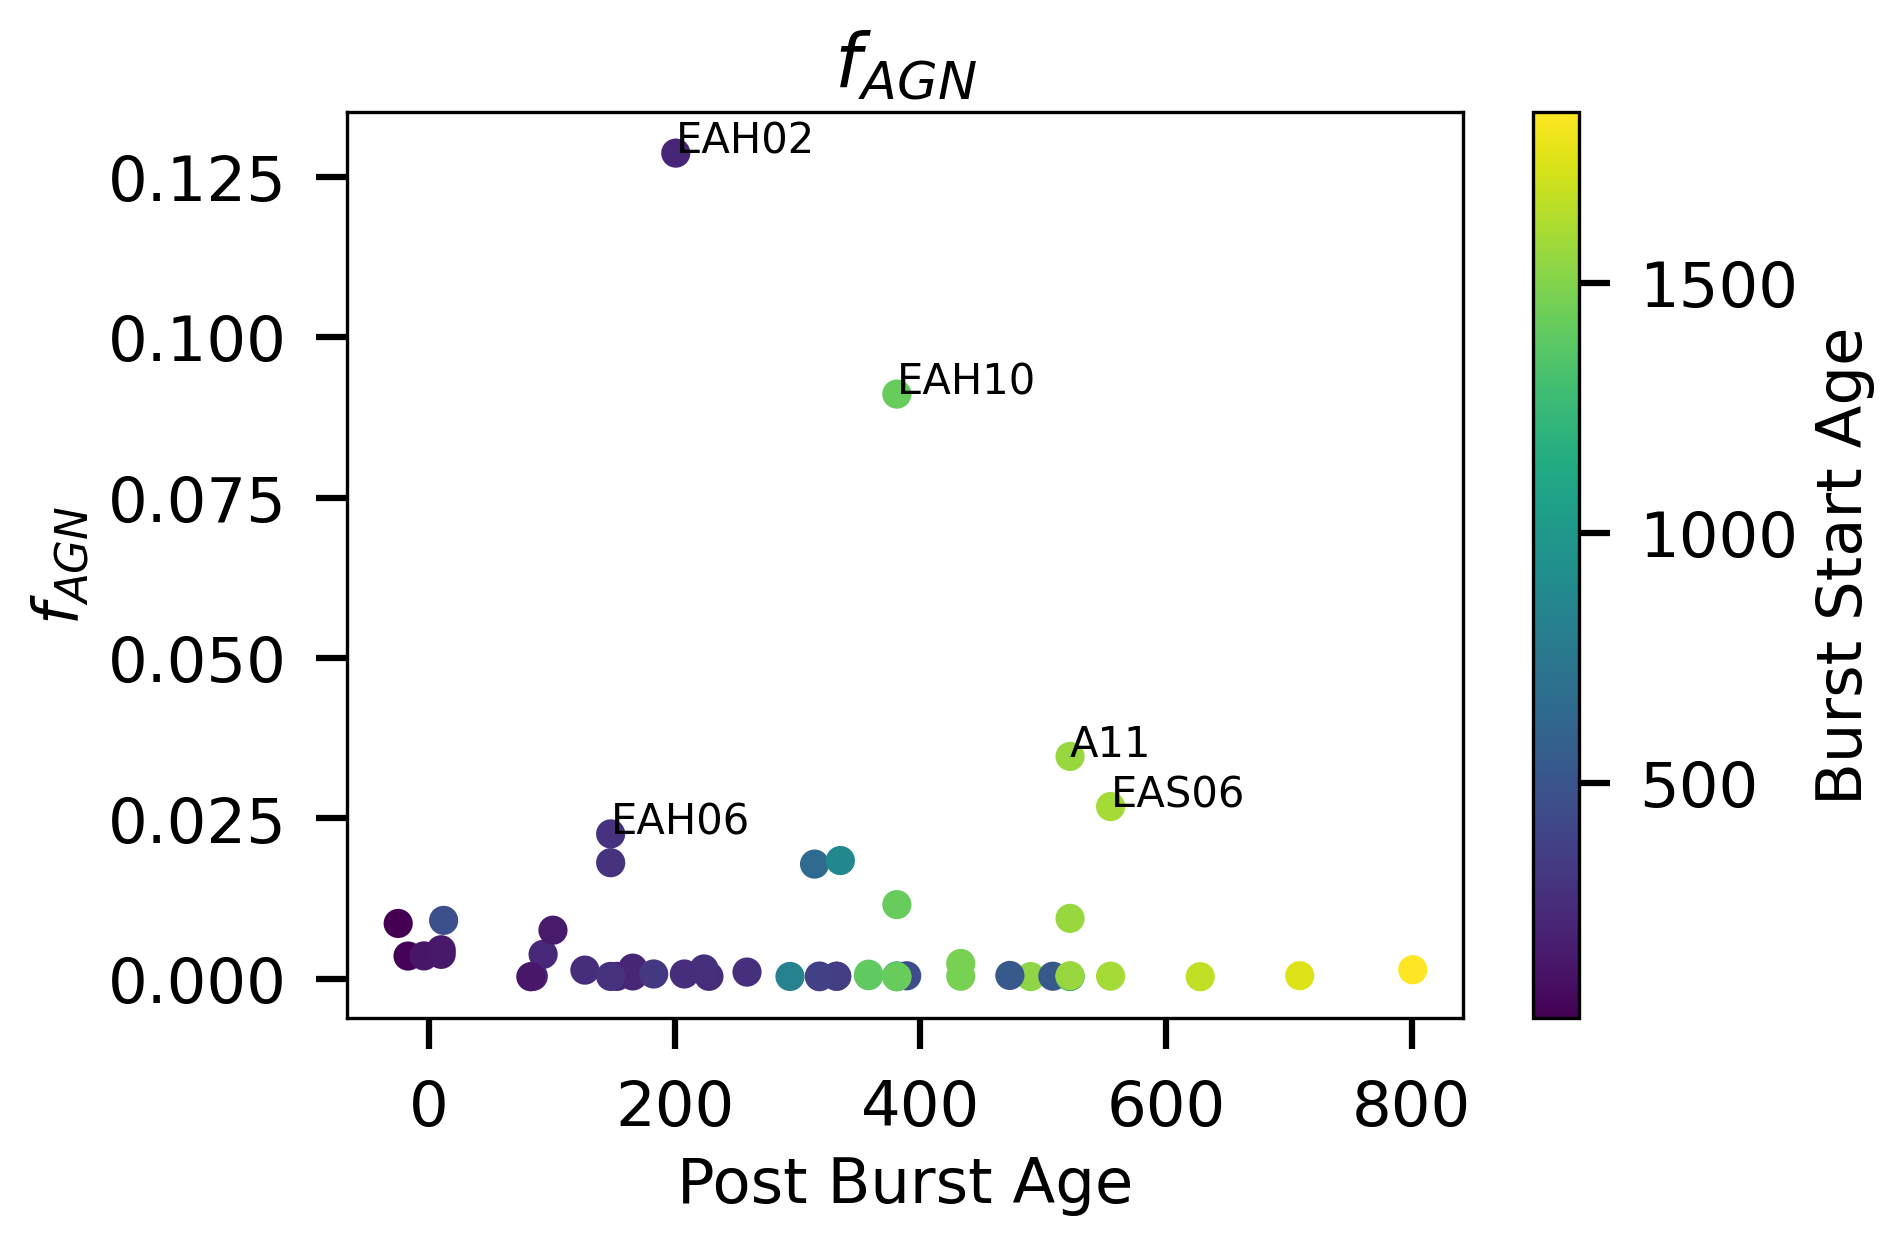

In [14]:
scatter(DSVP['T_90_Med'], DSVP['fagn'], c=DSVP['T_0_med'])
autoscale(True)

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (DSVP['T_90_Med'][i], DSVP['fagn'][i]),  fontsize=10)


cbar = colorbar()
cbar.set_label(label='Burst Start Age')

title('$f_{AGN}$')
ylabel('$f_{AGN}$')
xlabel('Post Burst Age')

In [15]:
def WISE(W1, W2, W1err, W2err):
    W1W2 = -2.5*np.log(W1/W2)
    W1W2err = 0.434*((W1/W2)*np.sqrt((W1err/W1)**2 + (W2err/W2)**2))
    return W1W2, W1W2err

WISE_v_offset = [2.699, 3.339, 5.174, 6.620]

def WISE2(W1, W2, W1err, W2err, num1, num2):
    W1_AB = -2.5*np.log(W1*10**-3)
    W2_AB = -2.5*np.log(W2*10**-3)
    W1W2_AB = W1_AB - W2_AB
    
    W1_v = W1_AB - WISE_v_offset[num1 -1]
    W2_v = W2_AB - WISE_v_offset[num2 -1]
    W1W2_v = W1_v - W2_v
    
    W1W2err = 0.434*((W1/W2)*np.sqrt((W1err/W1)**2 + (W2err/W2)**2))
    return W1W2_AB, W1W2_v, W1W2err



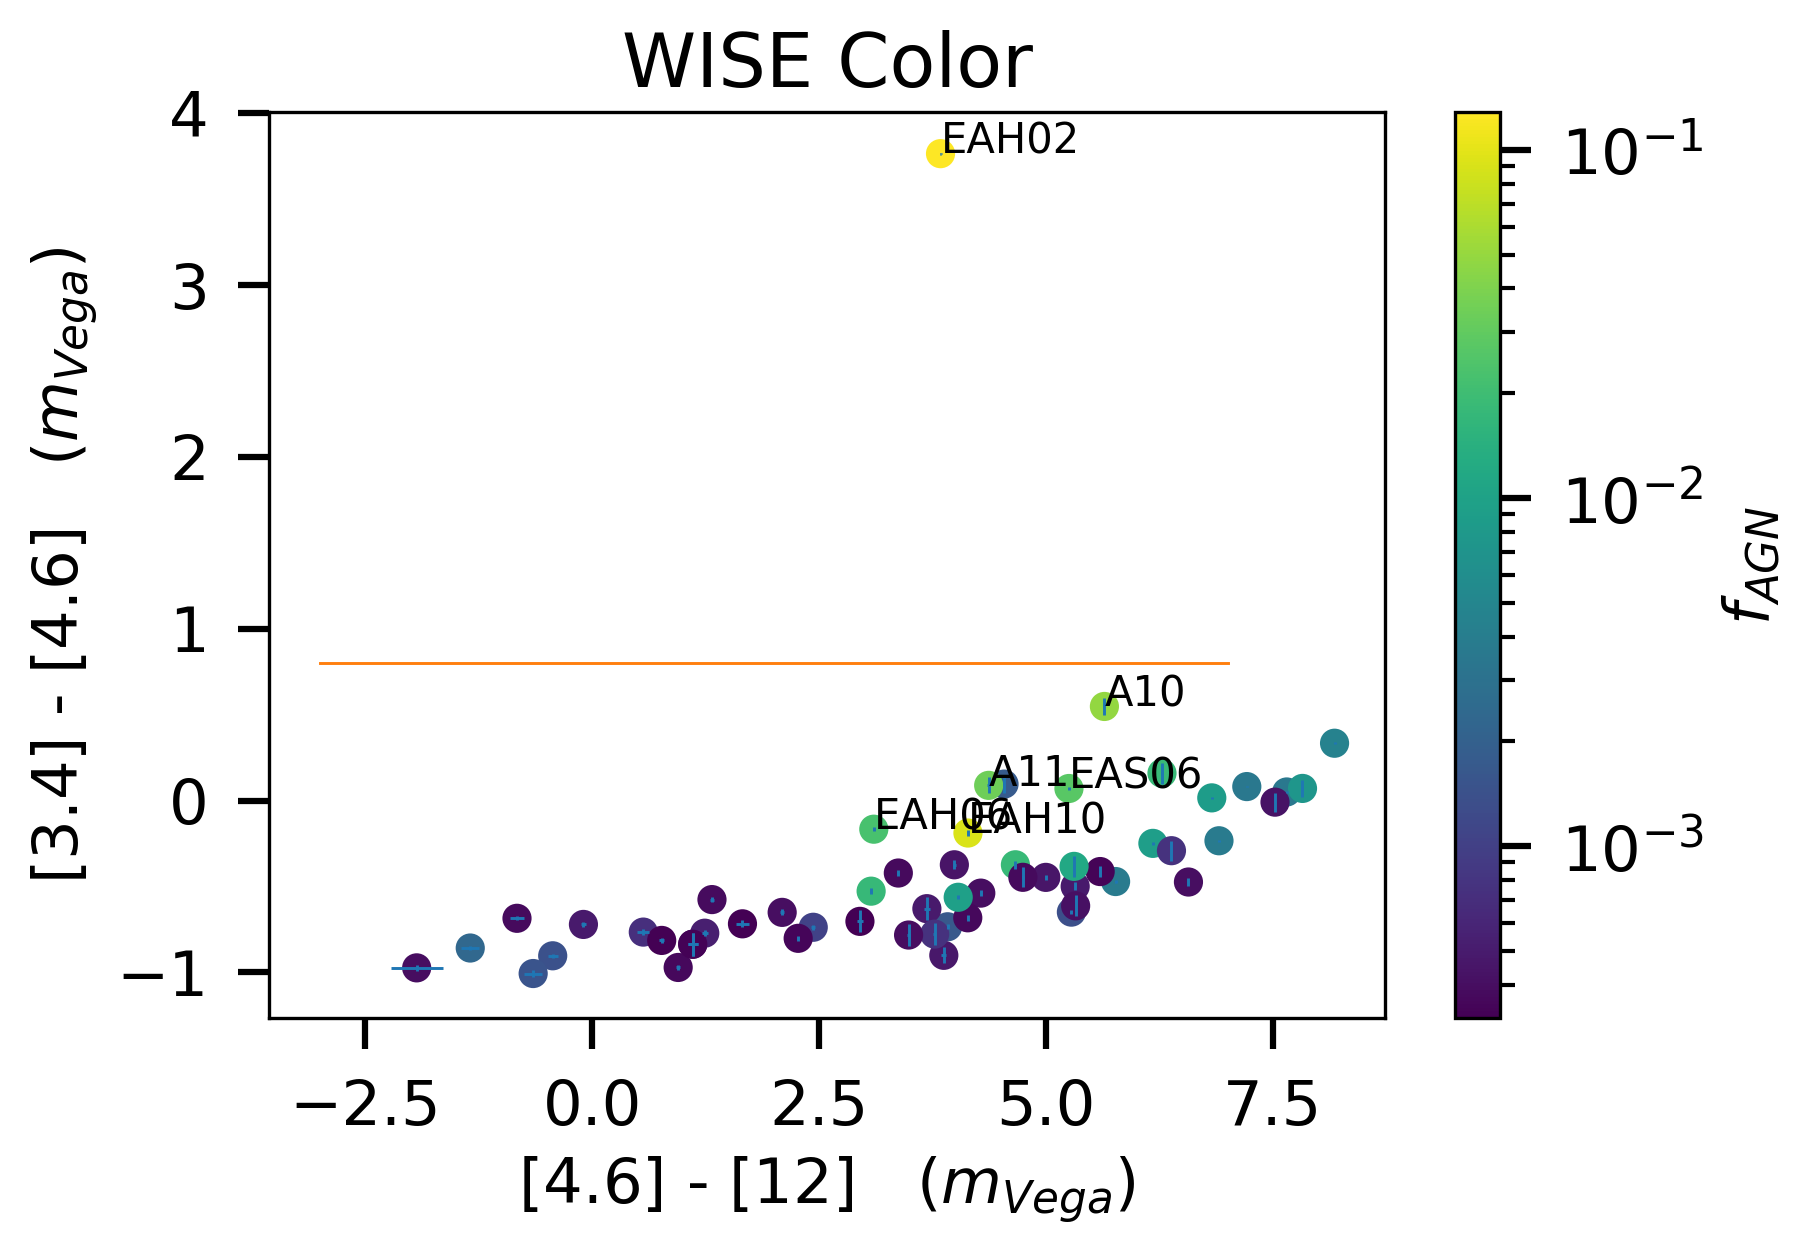

In [28]:
# xerr_prop = np.sqrt((DSVP['e_F3.4'])**2 + (DSVP['e_F4.6'])**2)
# yerr_prop = np.sqrt((DSVP['e_F4.6'])**2 + (DSVP['e_F12'])**2)
# errorbar((DSVP['F3.4'] - DSVP['F4.6']), (DSVP['F4.6'] - DSVP['F12']), xerr=xerr_prop, yerr=yerr_prop, fmt='none')
# scatter((DSVP['F3.4'] - DSVP['F4.6']), (DSVP['F4.6'] - DSVP['F12']), c=DSVP['fagn'])


# W1W2, W1W2err = WISE(DSVP['F3.4'], DSVP['F4.6'], DSVP['e_F3.4'], DSVP['e_F4.6'])
# W2W3, W2W3err = WISE(DSVP['F4.6'], DSVP['F12'], DSVP['e_F4.6'], DSVP['e_F12'])

# errorbar(W2W3, W1W2, xerr=W2W3err, yerr=W1W2err, fmt='none')
# scatter(W2W3, W1W2,  c=DSVP['fagn'], norm=colors.LogNorm())


W1W2_AB, W1W2_v, W1W2err = WISE2(DSVP['F3.4'], DSVP['F4.6'], DSVP['e_F3.4'], DSVP['e_F4.6'], 1, 2)
W2W3_AB, W2W3_v, W2W3err = WISE2(DSVP['F4.6'], DSVP['F12'], DSVP['e_F4.6'], DSVP['e_F12'], 2, 3)



errorbar(W2W3_v, W1W2_v, xerr=W2W3err, yerr=W1W2err, fmt='none')
scatter(W2W3_v, W1W2_v,  c=DSVP['fagn'], norm=colors.LogNorm())


for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
            annotate(DSVP['Gal_desig'][i], (W2W3_v[i], W1W2_v[i]),  fontsize=10)


cbar = colorbar()
cbar.set_label(label='$f_{AGN}$')

title('WISE Color')
ylabel('[3.4] - [4.6]   $(m_{Vega})$')
xlabel('[4.6] - [12]   $(m_{Vega})$')


plot(np.arange(-3, 8,1), np.arange(-3, 8,1)*0 +.8)


In [17]:
DSV_fagn_index = []
DSV_no_fagn_index = []
DSV_fagn_ = []
DSV_no_fagn_ = []

for i in range(0, len(DSVP['fagn'])):
    if DSVP['fagn'][i] >= .02:
        DSV_fagn_index.append(i)
        if math.isnan(DSVP['T_0_med'][i]) == False:
            DSV_fagn_.append(np.array((DSVP['Gal_desig'][i], DSVP['recno'][i], DSVP['fagn'][i], DSVP['T_0_med'][i], DSVP['z'][i], DSVP['logmass'][i], 'fagn', 'burst')))
        else:
            DSV_fagn_.append(np.array((DSVP['Gal_desig'][i], DSVP['recno'][i], DSVP['fagn'][i], 0, DSVP['z'][i], DSVP['logmass'][i], 'fagn', 'no burst')))

    else:
        DSV_no_fagn_index.append(i)
        if math.isnan(DSVP['T_0_med'][i]) == False:
            DSV_no_fagn_.append(np.array((DSVP['Gal_desig'][i], DSVP['recno'][i], DSVP['fagn'][i], DSVP['T_0_med'][i], DSVP['z'][i], DSVP['logmass'][i], 'no fagn', 'burst')))
        else:
            DSV_no_fagn_.append(np.array((DSVP['Gal_desig'][i], DSVP['recno'][i], DSVP['fagn'][i], 0, DSVP['z'][i], DSVP['logmass'][i], 'no fagn', 'no burst')))

# extra_fagn = []
# extra_fagn.extend(DSV_fagn_)
# extra_fagn.extend(extra_fagn)
# extra_fagn = np.array(extra_fagn)

# extra_fagn_L = []
# extra_fagn_L.extend()

DSV_fagn_idex = np.array(DSV_fagn_index)
DSV_no_fagn_index = np.array(DSV_no_fagn_index)
DSV_fagn_ = np.array(DSV_fagn_)
DSV_no_fagn_ = np.array(DSV_no_fagn_)



In [18]:
DSV_fagn_[:,3].astype('float64')
DSV_fagn_[:,3][DSV_fagn_[:,3].astype('float64') !=0]

array(['223.0', '288.0', '1421.0', '1595.0', '1562.0'], dtype='<U32')

In [19]:
T_test_fagn = stats.ttest_ind(DSV_fagn_[:,2].astype('float64'), DSV_no_fagn_[:,2].astype('float64'))
T_test_Tmed = stats.ttest_ind(DSV_fagn_[:,3][DSV_fagn_[:,3].astype('float64') !=0].astype('float64'), DSV_no_fagn_[:,3][DSV_no_fagn_[:,3].astype('float64') !=0].astype('float64'))
print('ttest:\n \t fagn:', T_test_fagn, '\n \t Tmed:', T_test_Tmed)

ttest:
 	 fagn: Ttest_indResult(statistic=9.488357079926066, pvalue=4.243442008725264e-13) 
 	 Tmed: Ttest_indResult(statistic=1.0137075770195785, pvalue=0.31541598341638544)


In [20]:
ks_fagn = stats.ks_2samp(DSV_fagn_[:,2].astype('float64'), DSV_no_fagn_[:,2].astype('float64'))
ks_Tmed = stats.ks_2samp(DSV_fagn_[:,3][DSV_fagn_[:,3].astype('float64') !=0].astype('float64'), DSV_no_fagn_[:,3][DSV_no_fagn_[:,3].astype('float64') !=0].astype('float64'))
print('ks2sap:\n \t fagn:', ks_fagn, '\n \t Tmed:', ks_Tmed)

ks2sap:
 	 fagn: KstestResult(statistic=1.0, pvalue=6.159828580543092e-08) 
 	 Tmed: KstestResult(statistic=0.3346938775510204, pvalue=0.5803889948174077)


In [21]:
DSV_Dis = np.concatenate((DSV_fagn_, DSV_no_fagn_))

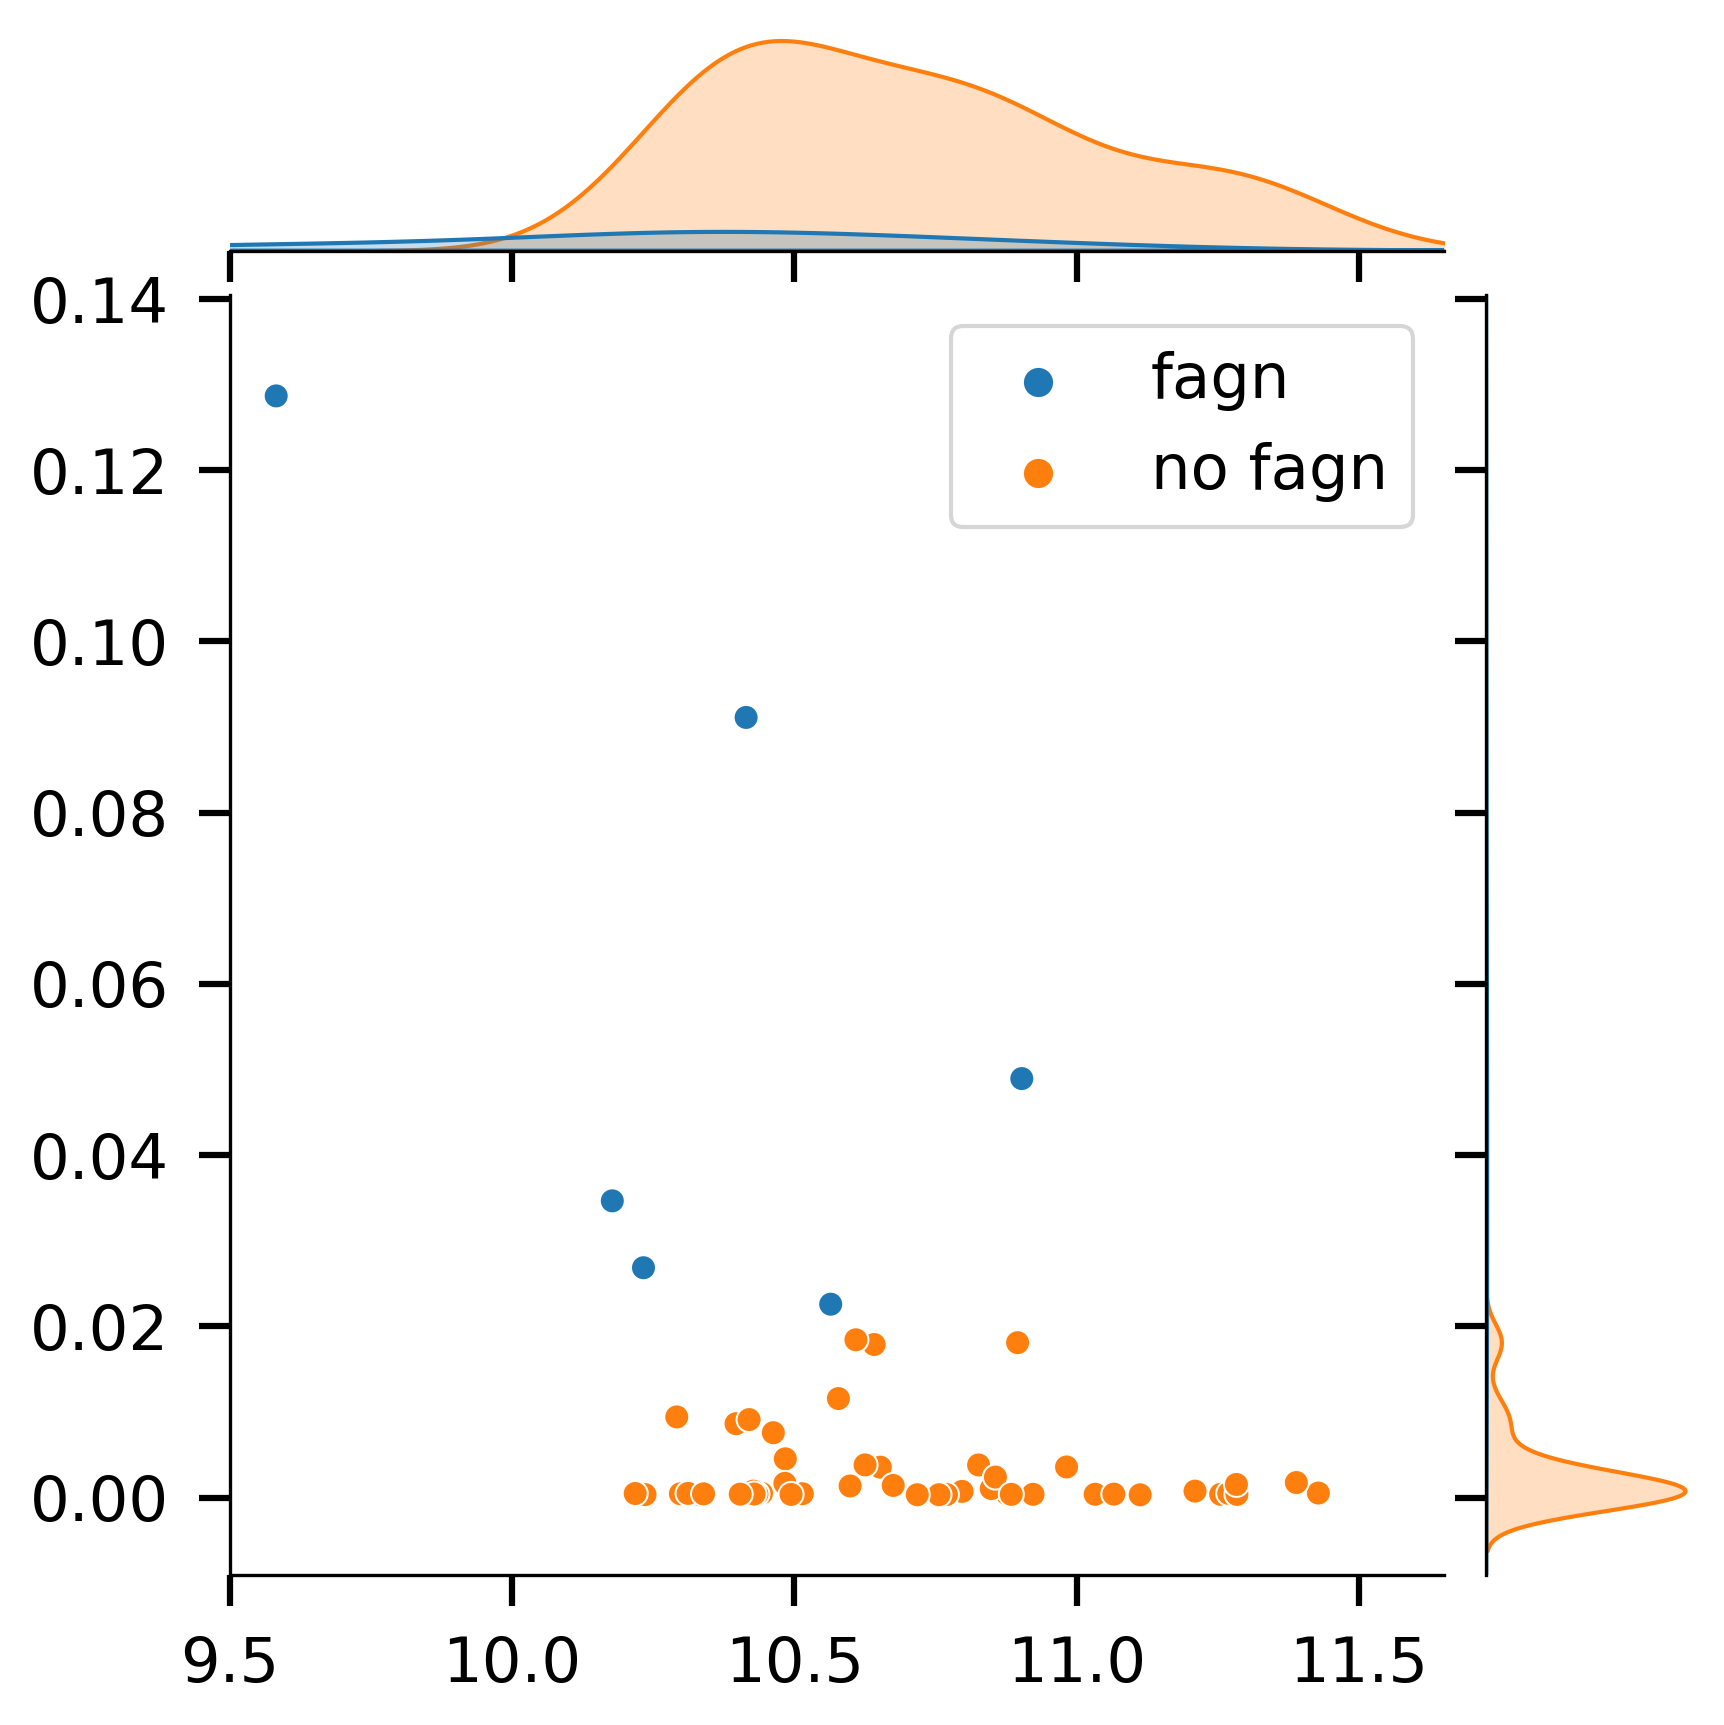

In [22]:
fagn_lmass_sns = sns.jointplot(x=DSV_Dis[:,5].astype('float64'), y=DSV_Dis[:,2].astype('float64'), hue=DSV_Dis[:,6], xlim=[9.5, 11.65], ylim=[-.009,0.1405])

# fagn_lmass_sns.xlim(9,11.5)

In [23]:
print(len(DSV_Dis[:,7] != 'no burst'), len(DSV_Dis[:,3][DSV_Dis[:,7] != 'no burst']), len(DSV_Dis[:,3][DSV_Dis[:,2] != 'no burst']), len(DSV_Dis[:,2]))

56 54 56 56


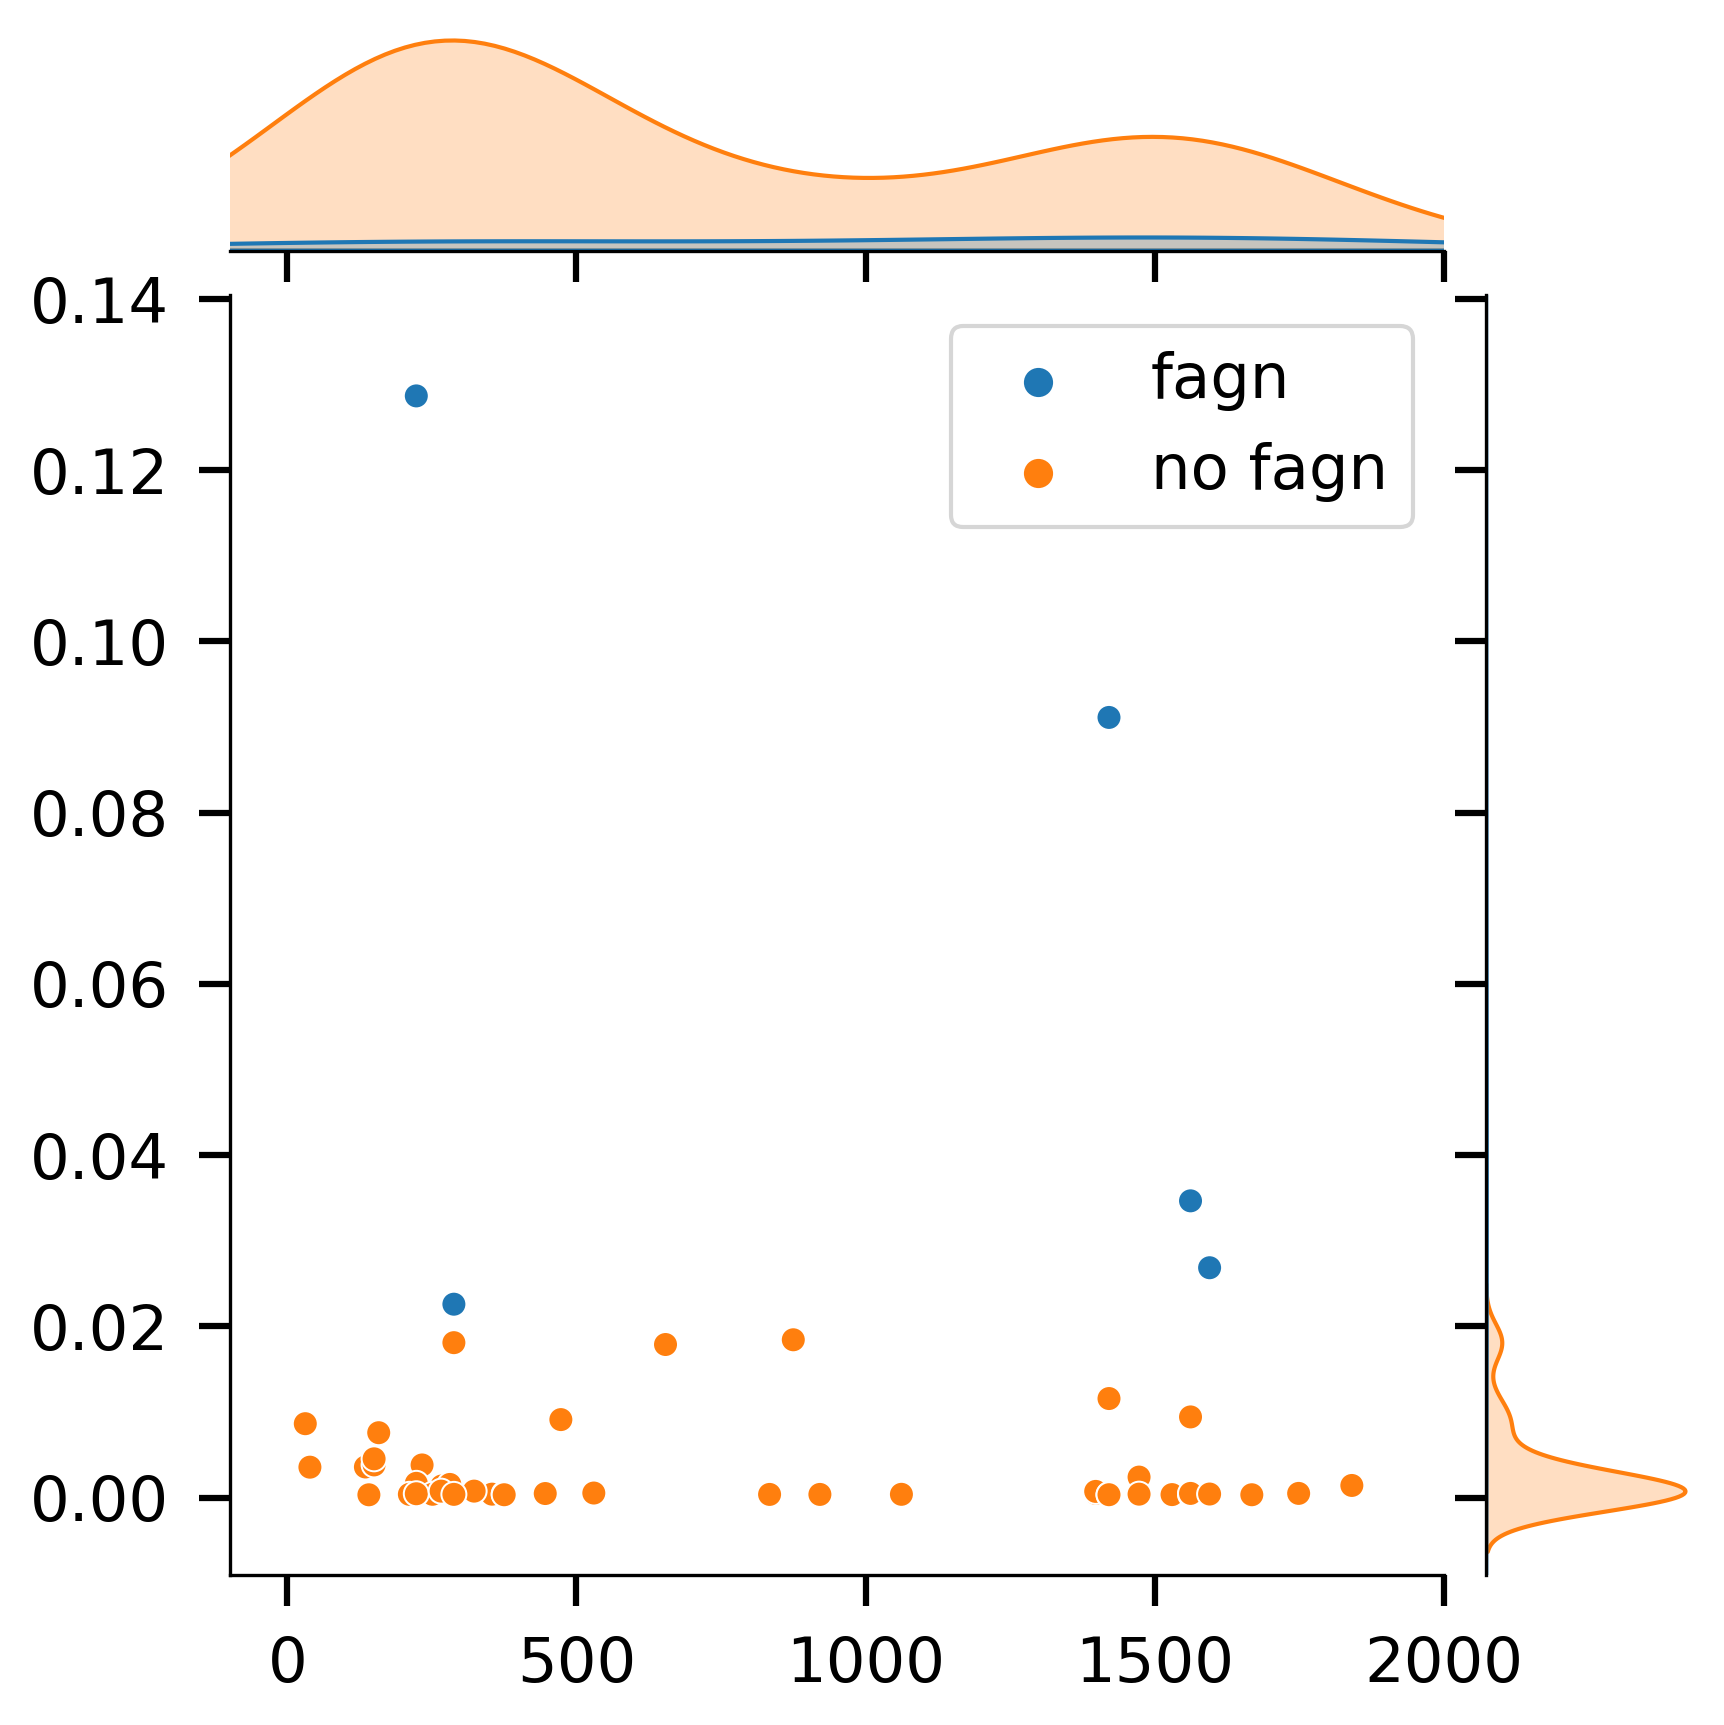

In [24]:
fagn_lmass_sns = sns.jointplot(x=DSV_Dis[:,3][DSV_Dis[:,7] != 'no burst'].astype('float64'), 
    y=DSV_Dis[:,2][DSV_Dis[:,7] != 'no burst'].astype('float64'), 
    hue=DSV_Dis[:,6][DSV_Dis[:,7] != 'no burst'], xlim=[-100, 2000], ylim=[-.009,0.1405])


In [25]:
# print(DSVP['1-Dec'])
# DSVP

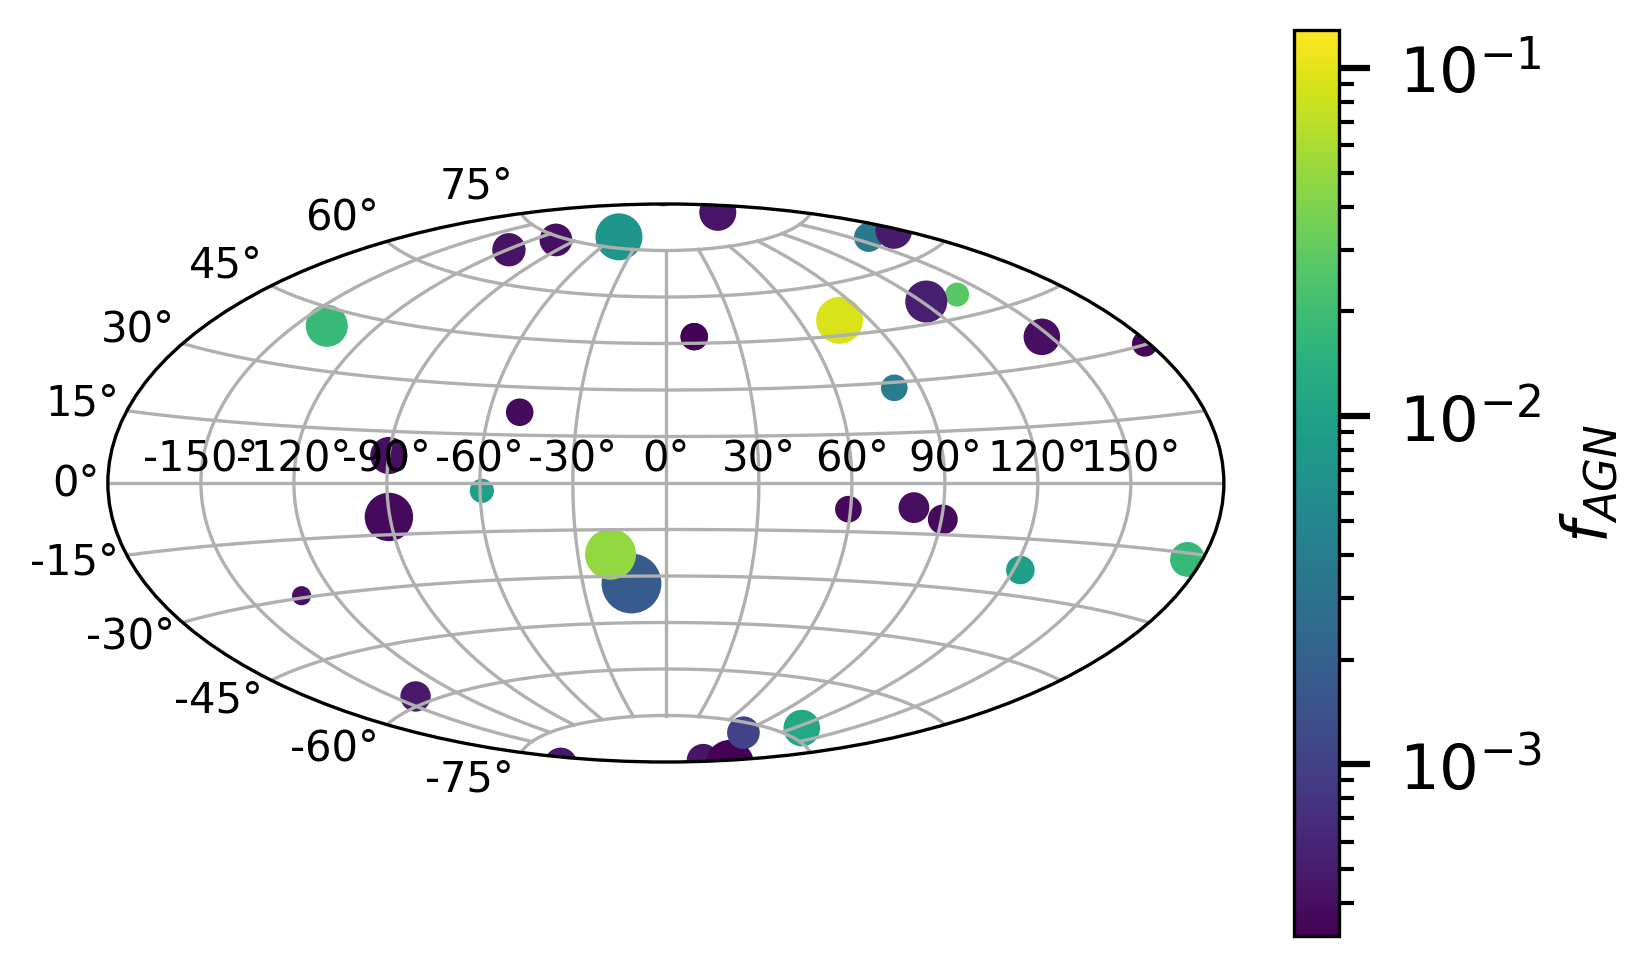

In [26]:
eq = SkyCoord(DSVP['ra1'], DSVP['1-Dec'],unit=u.deg)
subplot(111, projection='aitoff')
grid(True)
scatter(DSVP['ra1'], DSVP['1-Dec'],c=DSVP['fagn'], norm=colors.LogNorm(), s=DSVP['z']*1000)
xticks(fontsize=10)
yticks(fontsize=10)

# annotate(DSVP['Gal_desig'], (DSVP['ra1'], DSVP['1-Dec']),  fontsize=10)


cbar = colorbar()
cbar.set_label(label='$f_{AGN}$')

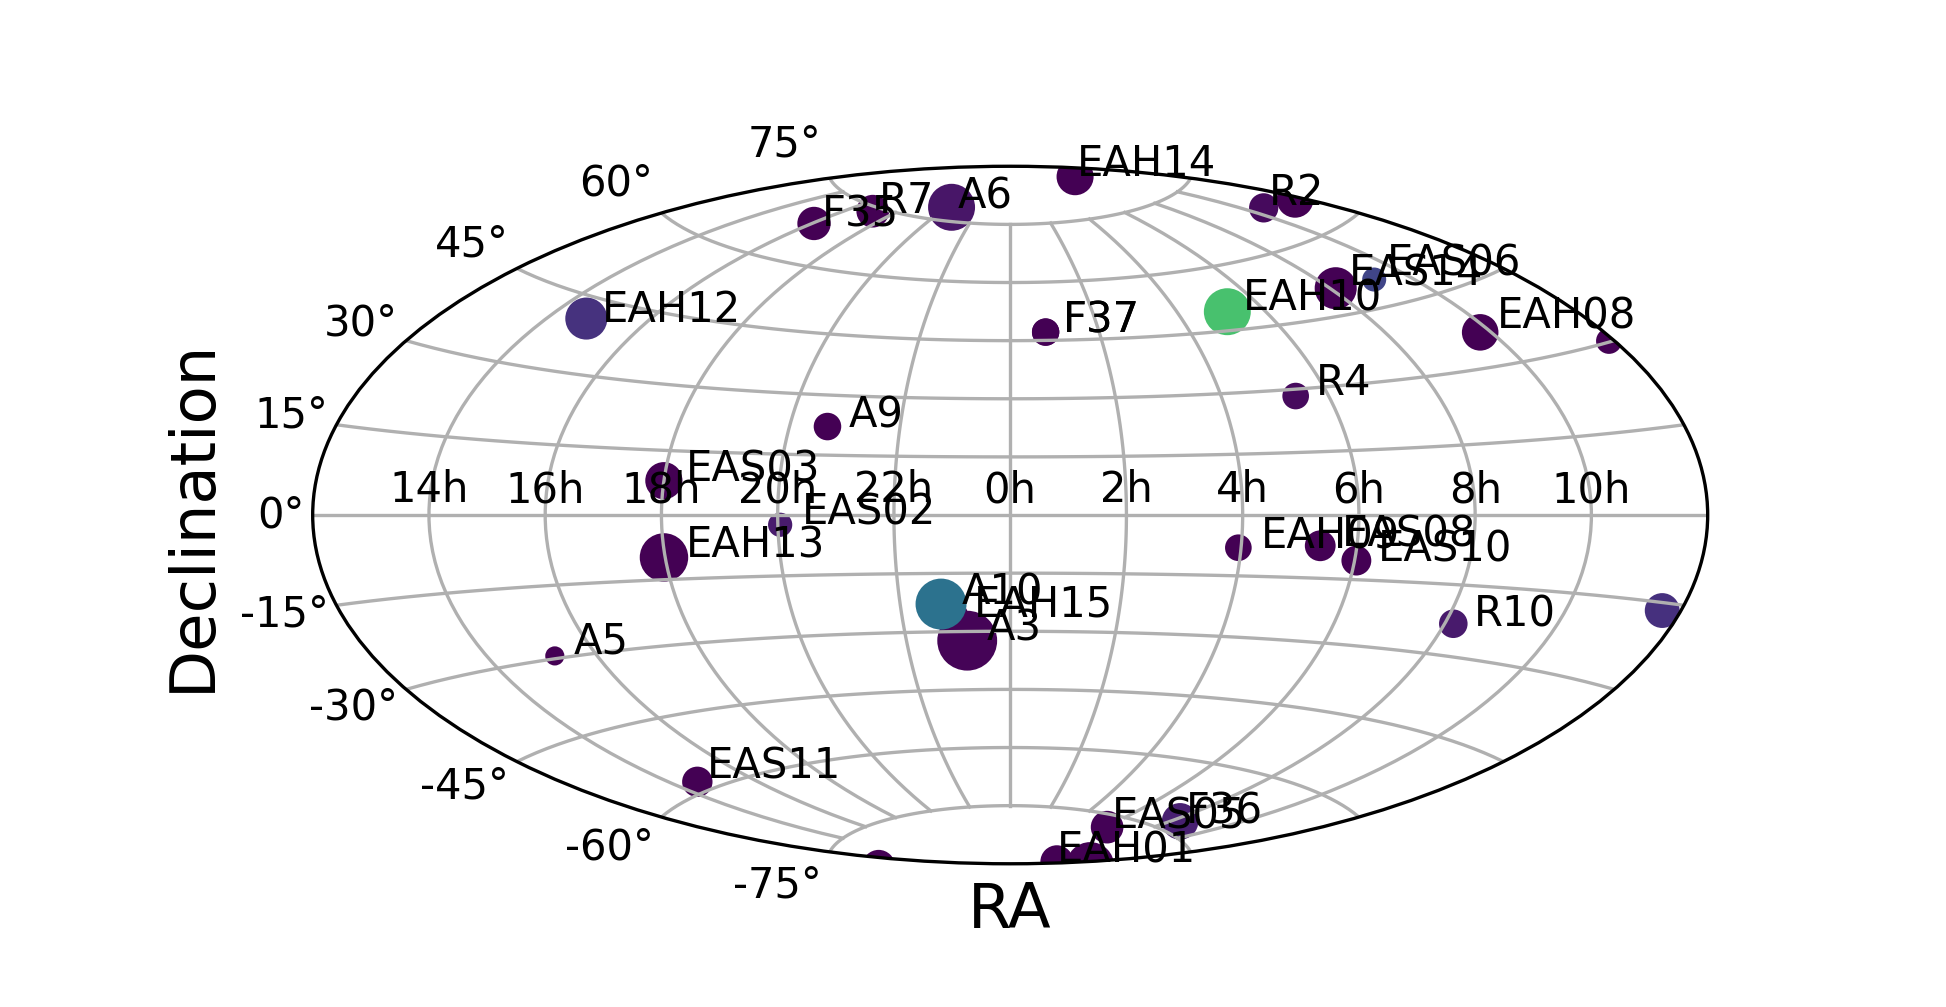

In [27]:
eq = SkyCoord(DSVP['ra1'], DSVP['1-Dec'],frame='icrs',unit=u.deg)
fig = figure()
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)
ax.scatter(DSVP['ra1'], DSVP['1-Dec'],c=DSVP['fagn'], s=DSVP['z']*1000)
# ax.tick_params(size=10)
# yticks(fontsize=10)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'], size=10)
ax.set_yticklabels(['-75°','-60°','-45°','-30°','-15°','0°','15°','30°','45°','60°','75°'], size=10)
for i in range(0, len(DSVP['Gal_desig'])):
    annotate(DSVP['Gal_desig'][i], (DSVP['ra1'][i] +.1, DSVP['1-Dec'][i]),  fontsize=10)
xlabel('RA', fontsize=15)
ylabel('Declination', fontsize=15)
show()

# cbar = colorbar()
# ax.colorbar.set_label(label='$f_{AGN}$')